In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsClassifier

Reading the file

In [2]:
cric_data = pd.read_excel('C://Users//ashwi//PGP-DSBA//Datasets//Sports Data.xlsx',sheet_name = 'Sports data for DSBA')
cric_data.head(20)

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1
5,Game_6,Win,24.0,Night,ODI,3.0,1,4.0,Batting,Srilanka,...,15.0,3,0.0,5,4.0,6.0,0,97.0,3,1
6,Game_7,Loss,24.0,Day and Night,T20,2.0,1,2.0,Batting,Zimbabwe,...,12.0,3,0.0,0,4.0,6.0,0,70.0,3,1
7,Game_8,Win,24.0,Night,ODI,3.0,1,2.0,Batting,Kenya,...,16.0,3,0.0,4,1.0,6.0,0,33.0,3,1
8,Game_9,Loss,24.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
9,Game_10,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1


In [3]:
cric_data.shape

(2930, 23)

The data file has 2930 records with 23 columns 

In [4]:
#cric_data.drop('Game_number',axis=1,inplace=True)
#cric_data

Game Number is a redundant column. It cannot be used in a hy analysis. Hence, dropping it

In [5]:
cric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [6]:
cric_data.isna().sum()

Game_number                0
Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [7]:
cric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2833.0,29.242852,2.264230,12.0,30.0,30.0,30.00,70.0
Bowlers_in_team,2848.0,2.913624,1.023907,1.0,2.0,3.0,4.00,5.0
Wicket_keeper_in_team,2930.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
All_rounder_in_team,2890.0,2.722491,1.092699,1.0,2.0,3.0,4.00,4.0
Audience_number,2849.0,46267.960688,48599.581459,7063.0,20363.0,34349.0,57876.00,1399930.0
Max_run_scored_1over,2902.0,15.199862,3.661010,11.0,12.0,14.0,18.00,25.0
Max_wicket_taken_1over,2930.0,2.713993,1.080623,1.0,2.0,3.0,4.00,4.0
Extra_bowls_bowled,2901.0,11.252671,7.780829,0.0,6.0,10.0,15.00,40.0
Min_run_given_1over,2930.0,1.952560,1.678332,0.0,0.0,2.0,3.00,6.0
Min_run_scored_1over,2903.0,2.762659,0.705759,1.0,2.0,3.0,3.00,4.0


In [8]:
cric_data.skew()

Avg_team_Age               5.043676
Bowlers_in_team           -0.292318
Wicket_keeper_in_team      0.000000
All_rounder_in_team       -0.322969
Audience_number           15.582284
Max_run_scored_1over       0.827107
Max_wicket_taken_1over    -0.305597
Extra_bowls_bowled         1.122510
Min_run_given_1over        0.433859
Min_run_scored_1over      -0.558124
Max_run_given_1over        2.672910
extra_bowls_opponent       0.916295
player_highest_run        -0.031165
dtype: float64

In [9]:
cric_data.var()

Avg_team_Age              5.126736e+00
Bowlers_in_team           1.048385e+00
Wicket_keeper_in_team     0.000000e+00
All_rounder_in_team       1.193990e+00
Audience_number           2.361919e+09
Max_run_scored_1over      1.340299e+01
Max_wicket_taken_1over    1.167745e+00
Extra_bowls_bowled        6.054131e+01
Min_run_given_1over       2.816800e+00
Min_run_scored_1over      4.980952e-01
Max_run_given_1over       2.503527e+01
extra_bowls_opponent      1.314866e+01
player_highest_run        4.133745e+02
dtype: float64

In [10]:
cric_data.columns

Index(['Game_number', 'Result', 'Avg_team_Age', 'Match_light_type',
       'Match_format', 'Bowlers_in_team', 'Wicket_keeper_in_team',
       'All_rounder_in_team', 'First_selection', 'Opponent', 'Season',
       'Audience_number', 'Offshore', 'Max_run_scored_1over',
       'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over',
       'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent',
       'player_highest_run', 'Players_scored_zero', 'player_highest_wicket'],
      dtype='object')

### Do columns have valid values

In [11]:
print('Unique values in Result: ',sorted(cric_data['Result'].unique()))
print('Unique values in Average age: ',sorted(cric_data['Avg_team_Age'].unique()))
print('Unique values in Match Light Type: ',cric_data['Match_light_type'].unique())
print('Unique values in Bowler number: ',sorted(cric_data['Bowlers_in_team'].unique()))
print('Unique values in wicket keeper number: ',sorted(cric_data['Wicket_keeper_in_team'].unique()))
print('Unique values in all-rounder number: ',sorted(cric_data['All_rounder_in_team'].unique()))
print('Unique values in first selection: ',cric_data['First_selection'].unique())
print('Unique values in opponent: ',cric_data['Opponent'].unique())
print('Unique values in season: ',cric_data['Season'].unique())
print('Unique values in offshore: ',cric_data['Offshore'].unique())
print('Unique values in max run scored per over: ',sorted(cric_data['Max_run_scored_1over'].unique()))
print('Unique values in max wicket taken per over: ',sorted(cric_data['Max_wicket_taken_1over'].unique()))
print('Unique values in extra balls bowled: ',sorted(cric_data['Extra_bowls_bowled'].unique()))
print('Unique values in min run given per over: ',sorted(cric_data['Min_run_given_1over'].unique()))
print('Unique values in min run scored per over: ',sorted(cric_data['Min_run_scored_1over'].unique()))
print('Unique values in max run given per over: ',sorted(cric_data['Max_run_given_1over'].unique()))
print('Unique values in extra balls by opponent: ',sorted(cric_data['extra_bowls_opponent'].unique()))
print('Unique values in player highest run: ',sorted(cric_data['player_highest_run'].unique()))
print('Unique values in players who scored zero: ',cric_data['Players_scored_zero'].unique())
print('Unique values in players with highest wicket: ',cric_data['player_highest_wicket'].unique())
print('Unique values in Match Format: ',cric_data['Match_format'].unique())

Unique values in Result:  ['Loss', 'Win']
Unique values in Average age:  [18.0, 24.0, nan, 12.0, 17.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 50.0, 69.0, 70.0]
Unique values in Match Light Type:  ['Day' 'Day and Night' nan 'Night']
Unique values in Bowler number:  [1.0, 2.0, 3.0, nan, 4.0, 5.0]
Unique values in wicket keeper number:  [1]
Unique values in all-rounder number:  [1.0, 2.0, 3.0, 4.0, nan]
Unique values in first selection:  ['Bowling' 'Batting' 'Bat' nan]
Unique values in opponent:  ['Srilanka' 'Zimbabwe' 'Kenya' 'Australia' 'England' 'South Africa'
 'Pakistan' 'West Indies' 'Bangladesh' nan]
Unique values in season:  ['Summer' nan 'Winter' 'Rainy']
Unique values in offshore:  ['No' 'Yes' nan]
Unique values in max run scored per over:  [11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, nan]
Unique values in max wicket taken per over:  [1, 2, 3, 4]
Unique values in extra balls bowled:  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.

Average age has values - 12,17,50,69,70 which are improbable values. But we will not tamper them right now as the number of such records are low<br>First selection column has 'Bat' and 'Batting' which mean the same. Hence, we will change the value 'Bat' to 'Batting'<br>Players who scored zero has the word 'Three'. We will convert it to number 3 to keep consistency in the column<br>Players with highest wicket has the word 'Three'. We will convert it to number 3 to keep consistency in the column

In [12]:
cric_data['First_selection'] = np.where(cric_data['First_selection']=='Bat','Batting',cric_data['First_selection'])
cric_data['Players_scored_zero'] = np.where(cric_data['Players_scored_zero']=='Three',3,cric_data['Players_scored_zero'])
cric_data['player_highest_wicket'] = np.where(cric_data['player_highest_wicket']=='Three',3,cric_data['player_highest_wicket'])
cric_data['Match_format'] = np.where(cric_data['Match_format']=='20-20','T20',cric_data['Match_format'])

In [13]:
print('Unique values in Result: ',sorted(cric_data['Result'].unique()))
print('Unique values in Average age: ',sorted(cric_data['Avg_team_Age'].unique()))
print('Unique values in Match Light Type: ',cric_data['Match_light_type'].unique())
print('Unique values in Bowler number: ',sorted(cric_data['Bowlers_in_team'].unique()))
print('Unique values in wicket keeper number: ',sorted(cric_data['Wicket_keeper_in_team'].unique()))
print('Unique values in all-rounder number: ',sorted(cric_data['All_rounder_in_team'].unique()))
print('Unique values in first selection: ',cric_data['First_selection'].unique())
print('Unique values in opponent: ',cric_data['Opponent'].unique())
print('Unique values in season: ',cric_data['Season'].unique())
print('Unique values in offshore: ',cric_data['Offshore'].unique())
print('Unique values in max run scored per over: ',sorted(cric_data['Max_run_scored_1over'].unique()))
print('Unique values in max wicket taken per over: ',sorted(cric_data['Max_wicket_taken_1over'].unique()))
print('Unique values in extra balls bowled: ',sorted(cric_data['Extra_bowls_bowled'].unique()))
print('Unique values in min run given per over: ',sorted(cric_data['Min_run_given_1over'].unique()))
print('Unique values in min run scored per over: ',sorted(cric_data['Min_run_scored_1over'].unique()))
print('Unique values in max run given per over: ',sorted(cric_data['Max_run_given_1over'].unique()))
print('Unique values in extra balls by opponent: ',sorted(cric_data['extra_bowls_opponent'].unique()))
print('Unique values in player highest run: ',sorted(cric_data['player_highest_run'].unique()))
print('Unique values in players who scored zero: ',cric_data['Players_scored_zero'].unique())
print('Unique values in players with highest wicket: ',cric_data['player_highest_wicket'].unique())
print('Unique values in players with Match Format: ',cric_data['Match_format'].unique())

Unique values in Result:  ['Loss', 'Win']
Unique values in Average age:  [18.0, 24.0, nan, 12.0, 17.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 50.0, 69.0, 70.0]
Unique values in Match Light Type:  ['Day' 'Day and Night' nan 'Night']
Unique values in Bowler number:  [1.0, 2.0, 3.0, nan, 4.0, 5.0]
Unique values in wicket keeper number:  [1]
Unique values in all-rounder number:  [1.0, 2.0, 3.0, 4.0, nan]
Unique values in first selection:  ['Bowling' 'Batting' nan]
Unique values in opponent:  ['Srilanka' 'Zimbabwe' 'Kenya' 'Australia' 'England' 'South Africa'
 'Pakistan' 'West Indies' 'Bangladesh' nan]
Unique values in season:  ['Summer' nan 'Winter' 'Rainy']
Unique values in offshore:  ['No' 'Yes' nan]
Unique values in max run scored per over:  [11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, nan]
Unique values in max wicket taken per over:  [1, 2, 3, 4]
Unique values in extra balls bowled:  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.

In [14]:
cric_data[['Players_scored_zero','player_highest_wicket']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Players_scored_zero    2930 non-null   object
 1   player_highest_wicket  2930 non-null   object
dtypes: object(2)
memory usage: 45.9+ KB


COlumns are strings. Convert them to integers

In [15]:
cric_data['Players_scored_zero'] = cric_data['Players_scored_zero'].astype('int64')
cric_data['player_highest_wicket'] = cric_data['player_highest_wicket'].astype('int64')

In [16]:
cric_data[['Players_scored_zero','player_highest_wicket']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Players_scored_zero    2930 non-null   int64
 1   player_highest_wicket  2930 non-null   int64
dtypes: int64(2)
memory usage: 45.9 KB


### Identifying outliers

In [17]:
age_count = cric_data['Avg_team_Age'].value_counts(normalize=True).mul(100).round(2).rename_axis('Age').reset_index(name='%_records').sort_values('Age')
age_count

,Age,%_records
10,12.0,0.04
11,17.0,0.04
12,18.0,0.04
1,24.0,6.49
6,25.0,1.76
5,26.0,2.61
4,27.0,3.25
3,28.0,3.25
2,29.0,4.62
0,30.0,77.76


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='Min_run_given_1over'>

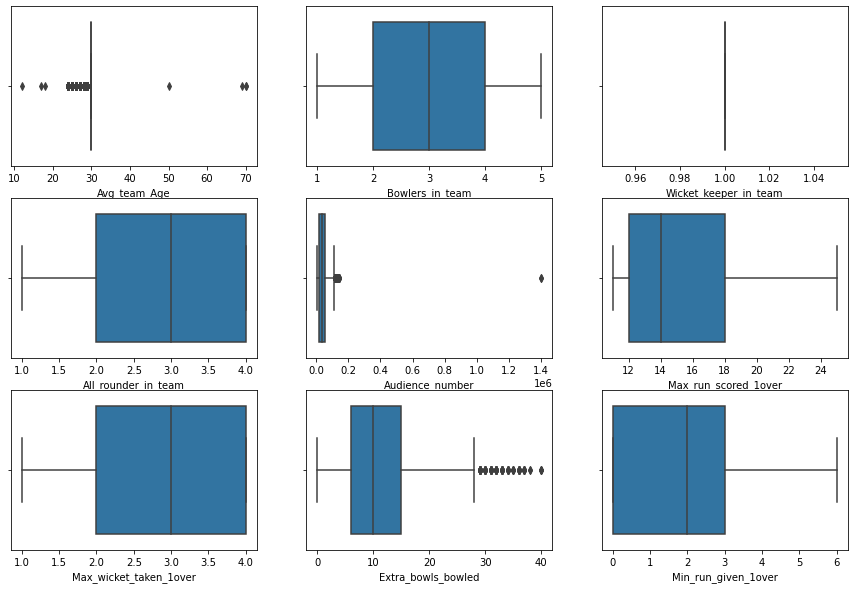

In [18]:
fig,axs = plt.subplots(3,3,figsize = (15, 10))
sns.boxplot(cric_data['Avg_team_Age'], ax=axs[0,0])
sns.boxplot(cric_data['Bowlers_in_team'], ax=axs[0,1])
sns.boxplot(cric_data['Wicket_keeper_in_team'], ax=axs[0,2])
sns.boxplot(cric_data['All_rounder_in_team'], ax=axs[1,0])
sns.boxplot(cric_data['Audience_number'], ax=axs[1,1])
sns.boxplot(cric_data['Max_run_scored_1over'], ax=axs[1,2])
sns.boxplot(cric_data['Max_wicket_taken_1over'], ax=axs[2,0])
sns.boxplot(cric_data['Extra_bowls_bowled'], ax=axs[2,1])
sns.boxplot(cric_data['Min_run_given_1over'], ax=axs[2,2])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='player_highest_wicket'>

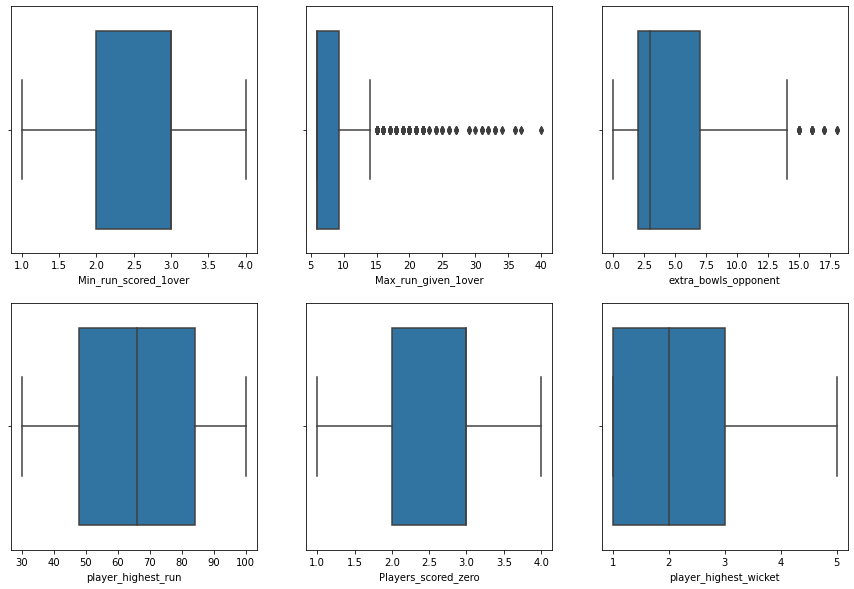

In [19]:
fig,axs = plt.subplots(2,3,figsize = (15, 10))
sns.boxplot(cric_data['Min_run_scored_1over'], ax=axs[0,0])
sns.boxplot(cric_data['Max_run_given_1over'], ax=axs[0,1])
sns.boxplot(cric_data['extra_bowls_opponent'], ax=axs[0,2])
sns.boxplot(cric_data['player_highest_run'], ax=axs[1,0])
sns.boxplot(cric_data['Players_scored_zero'], ax=axs[1,1])
sns.boxplot(cric_data['player_highest_wicket'], ax=axs[1,2])

0.23% of the data - those below age 18 and those above age 50 are invalid. Since the number of invalid records is low, we will not change them<br>The rest of the columns have extreme values but these are possible values. Hence, we will not change these values

### Missing value treatment

To treat missing values, we will use statistical imputation techniques like IterativeImputer<br>These techniques need categorical variables encoded. Hence, we will proceed with encoding first<br>The variables we are looking at are nominal. But techniques like One Hot Encoding will lead to 17 more columns, which makes the total number of columns 39. After encoding validating all these columns might prove difficult. Hence, for now, we will encode manually<br>The Result column is not needed in the prediction which will be made by iterative imputer. Hence, we will remove that column 

In [20]:
cric_data_cpy = cric_data.copy()
#cric_data_result = cric_data_cpy.pop('Result')

print('Unique values in Match Light Type: ',cric_data_cpy['Match_light_type'].unique())
print('Unique values in first selection: ',cric_data_cpy['First_selection'].unique())
print('Unique values in opponent: ',cric_data_cpy['Opponent'].unique())
print('Unique values in season: ',cric_data_cpy['Season'].unique())
print('Unique values in offshore: ',cric_data_cpy['Offshore'].unique())
print('Unique values in match format: ',cric_data_cpy['Match_format'].unique())

Unique values in Match Light Type:  ['Day' 'Day and Night' nan 'Night']
Unique values in first selection:  ['Bowling' 'Batting' nan]
Unique values in opponent:  ['Srilanka' 'Zimbabwe' 'Kenya' 'Australia' 'England' 'South Africa'
 'Pakistan' 'West Indies' 'Bangladesh' nan]
Unique values in season:  ['Summer' nan 'Winter' 'Rainy']
Unique values in offshore:  ['No' 'Yes' nan]
Unique values in match format:  ['ODI' 'T20' 'Test' nan]


In [21]:
cric_data_cpy['Match_light_type'] = cric_data_cpy['Match_light_type'].replace({'Day':1,'Day and Night':2,'Night':3})
cric_data_cpy['First_selection'] = cric_data_cpy['First_selection'].replace({'Bowling':1,'Batting':2})
cric_data_cpy['Season'] = cric_data_cpy['Season'].replace({'Summer':1,'Winter':2,'Rainy':3})
cric_data_cpy['Offshore'] = cric_data_cpy['Offshore'].replace({'No':0,'Yes':1})
cric_data_cpy['Match_format'] = cric_data_cpy['Match_format'].replace({'ODI':1,'T20':2,'Test':3})
cric_data_cpy['Opponent'] = cric_data_cpy['Opponent'].replace({'Srilanka':1,'Zimbabwe':2,'Kenya':3,'Australia':4,'England':5,'South Africa':6,'Pakistan':7,'West Indies':8,'Bangladesh':9})
cric_data_cpy['Game_number'] = cric_data_cpy['Game_number'].str[5:]
cric_data_cpy['Result'] = cric_data_cpy['Result'].replace({'Loss':0,'Win':1})

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer

imputer = IterativeImputer(estimator=RandomForestClassifier())
imputer1 = KNNImputer(n_neighbors=2)

# fit on the dataset
#imputer.fit(cric_data_cpy)

#cric_data_trans = imputer.fit_transform(cric_data_cpy)


In [23]:
cric_data_cpy.columns

Index(['Game_number', 'Result', 'Avg_team_Age', 'Match_light_type',
       'Match_format', 'Bowlers_in_team', 'Wicket_keeper_in_team',
       'All_rounder_in_team', 'First_selection', 'Opponent', 'Season',
       'Audience_number', 'Offshore', 'Max_run_scored_1over',
       'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over',
       'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent',
       'player_highest_run', 'Players_scored_zero', 'player_highest_wicket'],
      dtype='object')

In [24]:
cric_data_cpy['Game_number'].str[5:]

0        
1        
2        
3        
4        
       ..
2925     
2926     
2927     
2928     
2929     
Name: Game_number, Length: 2930, dtype: object

In [25]:
subset1 = cric_data_cpy[['Game_number','Avg_team_Age','Match_light_type','Match_format','Bowlers_in_team','Wicket_keeper_in_team','All_rounder_in_team']]
subset2 = cric_data_cpy[['Game_number','First_selection','Opponent']]
subset3 = cric_data_cpy[['Game_number','Season']]
subset4 = cric_data_cpy[['Game_number','Audience_number']]
subset5 = cric_data_cpy[['Game_number','Offshore','Max_run_scored_1over','Max_wicket_taken_1over']]
subset6 = cric_data_cpy[['Game_number','Extra_bowls_bowled','Min_run_given_1over']]
subset7 = cric_data_cpy[['Game_number','Min_run_scored_1over','Max_run_given_1over']]
subset8 = cric_data_cpy[['Game_number','extra_bowls_opponent','player_highest_run']]
subset9 = cric_data_cpy[['Game_number','Players_scored_zero','player_highest_wicket','Result']]

impute_data_subset1 = pd.DataFrame(imputer.fit_transform(subset1),columns=subset1.columns)
impute_data_subset2 = pd.DataFrame(imputer.fit_transform(subset2),columns=subset2.columns)
impute_data_subset3 = pd.DataFrame(imputer.fit_transform(subset3),columns=subset3.columns)
impute_data_subset4 = pd.DataFrame(imputer1.fit_transform(subset4),columns=subset4.columns)
impute_data_subset5 = pd.DataFrame(imputer.fit_transform(subset5),columns=subset5.columns)
impute_data_subset6 = pd.DataFrame(imputer.fit_transform(subset6),columns=subset6.columns)
impute_data_subset7 = pd.DataFrame(imputer.fit_transform(subset7),columns=subset7.columns)
impute_data_subset8 = pd.DataFrame(imputer.fit_transform(subset8),columns=subset8.columns)
impute_data_subset9 = pd.DataFrame(imputer.fit_transform(subset9),columns=subset9.columns)

In [26]:
#impute_data_subset1
cric_data_trans = pd.merge(impute_data_subset1,impute_data_subset2,on='Game_number')
cric_data_trans = pd.merge(cric_data_trans,impute_data_subset3,on='Game_number')
cric_data_trans = pd.merge(cric_data_trans,impute_data_subset4,on='Game_number')
cric_data_trans = pd.merge(cric_data_trans,impute_data_subset5,on='Game_number')
cric_data_trans = pd.merge(cric_data_trans,impute_data_subset6,on='Game_number')
cric_data_trans = pd.merge(cric_data_trans,impute_data_subset7,on='Game_number')
cric_data_trans = pd.merge(cric_data_trans,impute_data_subset8,on='Game_number')
cric_data_trans = pd.merge(cric_data_trans,impute_data_subset9,on='Game_number')
cric_data_trans

,Game_number,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,...,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Result
0,1.0,18.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,...,3.0,0.0,2.0,3.0,6.0,0.0,54.0,3.0,1.0,0.0
1,2.0,24.0,1.0,2.0,3.0,1.0,4.0,2.0,2.0,1.0,...,1.0,0.0,0.0,3.0,6.0,0.0,69.0,2.0,1.0,1.0
2,3.0,24.0,2.0,2.0,3.0,1.0,2.0,1.0,2.0,1.0,...,4.0,0.0,0.0,3.0,6.0,0.0,69.0,3.0,1.0,0.0
3,4.0,24.0,3.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,...,4.0,0.0,2.0,3.0,6.0,0.0,73.0,3.0,1.0,1.0
4,5.0,24.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,...,4.0,0.0,0.0,3.0,6.0,0.0,80.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926.0,30.0,1.0,2.0,3.0,1.0,4.0,2.0,6.0,1.0,...,3.0,8.0,0.0,3.0,6.0,3.0,50.0,3.0,2.0,1.0
2926,2927.0,30.0,1.0,1.0,4.0,1.0,3.0,1.0,3.0,1.0,...,4.0,8.0,2.0,3.0,6.0,2.0,52.0,2.0,1.0,1.0
2927,2928.0,30.0,2.0,1.0,4.0,1.0,3.0,1.0,7.0,3.0,...,4.0,10.0,2.0,4.0,10.0,2.0,80.0,3.0,2.0,1.0
2928,2929.0,30.0,1.0,1.0,4.0,1.0,3.0,2.0,3.0,3.0,...,2.0,20.0,2.0,3.0,6.0,3.0,98.0,3.0,1.0,1.0


In [27]:
cric_data_transIter = cric_data_trans.drop('Game_number',axis=1)

cric_data_transIter['Match_light_type'] = cric_data_transIter['Match_light_type'].replace({1:'Day',2:'Day and Night',3:'Night'})
cric_data_transIter['First_selection'] = cric_data_transIter['First_selection'].replace({1:'Bowling',2:'Batting'})
cric_data_transIter['Season'] = cric_data_transIter['Season'].replace({1:'Summer',2:'Winter',3:'Rainy'})
cric_data_transIter['Offshore'] = cric_data_transIter['Offshore'].replace({0:'No',1:'Yes'})
cric_data_transIter['Match_format'] = cric_data_transIter['Match_format'].replace({1:'ODI',2:'T20',3:'Test'})
cric_data_transIter['Opponent'] = cric_data_transIter['Opponent'].replace({1:'Srilanka',2:'Zimbabwe',3:'Kenya',4:'Australia',5:'England',6:'South Africa',7:'Pakistan',8:'West Indies',9:'Bangladesh'})

In [28]:
print('Unique values in Match Light Type: ',cric_data_transIter['Match_light_type'].unique())
print('Unique values in first selection: ',cric_data_transIter['First_selection'].unique())
print('Unique values in opponent: ',cric_data_transIter['Opponent'].unique())
print('Unique values in season: ',cric_data_transIter['Season'].unique())
print('Unique values in offshore: ',cric_data_transIter['Offshore'].unique())
print('Unique values in match format: ',cric_data_transIter['Match_format'].unique())

Unique values in Match Light Type:  ['Day' 'Day and Night' 'Night']
Unique values in first selection:  ['Bowling' 'Batting']
Unique values in opponent:  ['Srilanka' 'Zimbabwe' 'Kenya' 'Australia' 'England' 'South Africa'
 'Pakistan' 'West Indies' 'Bangladesh']
Unique values in season:  ['Summer' 'Winter' 'Rainy']
Unique values in offshore:  ['No' 'Yes']
Unique values in match format:  ['ODI' 'T20' 'Test']


### Verify Imputation

To verify that imputed values are applied, we will check if there are any missing values<br>That apart, we need to check the variation in the variables before and after imputation so that the distribution is not changed

In [29]:
cric_data_transIter.isna().sum()

Avg_team_Age              0
Match_light_type          0
Match_format              0
Bowlers_in_team           0
Wicket_keeper_in_team     0
All_rounder_in_team       0
First_selection           0
Opponent                  0
Season                    0
Audience_number           0
Offshore                  0
Max_run_scored_1over      0
Max_wicket_taken_1over    0
Extra_bowls_bowled        0
Min_run_given_1over       0
Min_run_scored_1over      0
Max_run_given_1over       0
extra_bowls_opponent      0
player_highest_run        0
Players_scored_zero       0
player_highest_wicket     0
Result                    0
dtype: int64

There are no missing values

In [30]:
cric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2833.0,29.242852,2.264230,12.0,30.0,30.0,30.00,70.0
Bowlers_in_team,2848.0,2.913624,1.023907,1.0,2.0,3.0,4.00,5.0
Wicket_keeper_in_team,2930.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
All_rounder_in_team,2890.0,2.722491,1.092699,1.0,2.0,3.0,4.00,4.0
Audience_number,2849.0,46267.960688,48599.581459,7063.0,20363.0,34349.0,57876.00,1399930.0
Max_run_scored_1over,2902.0,15.199862,3.661010,11.0,12.0,14.0,18.00,25.0
Max_wicket_taken_1over,2930.0,2.713993,1.080623,1.0,2.0,3.0,4.00,4.0
Extra_bowls_bowled,2901.0,11.252671,7.780829,0.0,6.0,10.0,15.00,40.0
Min_run_given_1over,2930.0,1.952560,1.678332,0.0,0.0,2.0,3.00,6.0
Min_run_scored_1over,2903.0,2.762659,0.705759,1.0,2.0,3.0,3.00,4.0


In [31]:
cric_data_transIter.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2930.0,29.238908,2.250508,12.0,30.0,30.0,30.0,70.0
Bowlers_in_team,2930.0,2.914334,1.026368,1.0,2.0,3.0,4.0,5.0
Wicket_keeper_in_team,2930.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
All_rounder_in_team,2930.0,2.726280,1.093211,1.0,2.0,3.0,4.0,4.0
Audience_number,2930.0,46316.565529,48113.056401,7063.0,20524.0,34569.5,58579.5,1399930.0
Max_run_scored_1over,2930.0,15.213652,3.665059,11.0,12.0,14.0,18.0,25.0
Max_wicket_taken_1over,2930.0,2.713993,1.080623,1.0,2.0,3.0,4.0,4.0
Extra_bowls_bowled,2930.0,11.299317,7.822862,0.0,6.0,10.0,15.0,40.0
Min_run_given_1over,2930.0,1.952560,1.678332,0.0,0.0,2.0,3.0,6.0
Min_run_scored_1over,2930.0,2.761433,0.705594,1.0,2.0,3.0,3.0,4.0


In [32]:
print('Match Light Type: ',cric_data['Match_light_type'].value_counts(normalize=True))
print('**************************************************')
print('first selection: ',cric_data['First_selection'].value_counts(normalize=True))
print('**************************************************')
print('opponent: ',cric_data['Opponent'].value_counts(normalize=True))
print('**************************************************')
print('season: ',cric_data['Season'].value_counts(normalize=True))
print('**************************************************')
print('offshore: ',cric_data['Offshore'].value_counts(normalize=True))
print('**************************************************')
print('match format: ',cric_data['Match_format'].value_counts(normalize=True))

Match Light Type:  Day              0.709173
Day and Night    0.187978
Night            0.102849
Name: Match_light_type, dtype: float64
**************************************************
first selection:  Bowling    0.599791
Batting    0.400209
Name: First_selection, dtype: float64
**************************************************
opponent:  South Africa    0.221147
Kenya           0.199032
Srilanka        0.177263
England         0.097789
Pakistan        0.087422
Bangladesh      0.070491
Zimbabwe        0.056323
West Indies     0.054596
Australia       0.035936
Name: Opponent, dtype: float64
**************************************************
season:  Rainy     0.456416
Summer    0.320084
Winter    0.223501
Name: Season, dtype: float64
**************************************************
offshore:  No     0.717725
Yes    0.282275
Name: Offshore, dtype: float64
**************************************************
match format:  ODI     0.652098
T20     0.304196
Test    0.043706
Name: Match

In [33]:
print('Match Light Type: ',cric_data_transIter['Match_light_type'].value_counts(normalize=True))
print('**************************************************')
print('first selection: ',cric_data_transIter['First_selection'].value_counts(normalize=True))
print('**************************************************')
print('opponent: ',cric_data_transIter['Opponent'].value_counts(normalize=True))
print('**************************************************')
print('season: ',cric_data_transIter['Season'].value_counts(normalize=True))
print('**************************************************')
print('offshore: ',cric_data_transIter['Offshore'].value_counts(normalize=True))
print('**************************************************')
print('match format: ',cric_data_transIter['Match_format'].value_counts(normalize=True))

Match Light Type:  Day              0.710580
Day and Night    0.187031
Night            0.102389
Name: Match_light_type, dtype: float64
**************************************************
first selection:  Bowling    0.599659
Batting    0.400341
Name: First_selection, dtype: float64
**************************************************
opponent:  South Africa    0.220819
Kenya           0.199317
Srilanka        0.176451
England         0.098976
Pakistan        0.087031
Bangladesh      0.070648
Zimbabwe        0.056314
West Indies     0.054266
Australia       0.036177
Name: Opponent, dtype: float64
**************************************************
season:  Rainy     0.457338
Summer    0.318771
Winter    0.223891
Name: Season, dtype: float64
**************************************************
offshore:  No     0.718089
Yes    0.281911
Name: Offshore, dtype: float64
**************************************************
match format:  ODI     0.654608
T20     0.302048
Test    0.043345
Name: Match

### Univariate Analysis

In [34]:
#merge the data with result column
#cric_data_transIter['Result'] = cric_data_result

cric_data_transIter.head(20)

,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,...,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Result
0,18.0,Day,ODI,3.0,1.0,3.0,Bowling,Srilanka,Summer,9940.0,...,3.0,0.0,2.0,3.0,6.0,0.0,54.0,3.0,1.0,0.0
1,24.0,Day,T20,3.0,1.0,4.0,Batting,Zimbabwe,Summer,8400.0,...,1.0,0.0,0.0,3.0,6.0,0.0,69.0,2.0,1.0,1.0
2,24.0,Day and Night,T20,3.0,1.0,2.0,Bowling,Zimbabwe,Summer,13146.0,...,4.0,0.0,0.0,3.0,6.0,0.0,69.0,3.0,1.0,0.0
3,24.0,Night,ODI,2.0,1.0,2.0,Bowling,Kenya,Summer,7357.0,...,4.0,0.0,2.0,3.0,6.0,0.0,73.0,3.0,1.0,1.0
4,24.0,Night,ODI,1.0,1.0,3.0,Bowling,Srilanka,Summer,13328.0,...,4.0,0.0,0.0,3.0,6.0,0.0,80.0,3.0,1.0,0.0
5,24.0,Night,ODI,3.0,1.0,4.0,Batting,Srilanka,Summer,11277.0,...,3.0,0.0,5.0,4.0,6.0,0.0,97.0,3.0,1.0,1.0
6,24.0,Day and Night,T20,2.0,1.0,2.0,Batting,Zimbabwe,Summer,10983.0,...,3.0,0.0,0.0,4.0,6.0,0.0,70.0,3.0,1.0,0.0
7,24.0,Night,ODI,3.0,1.0,2.0,Batting,Kenya,Summer,10598.0,...,3.0,0.0,4.0,1.0,6.0,0.0,33.0,3.0,1.0,1.0
8,24.0,Day,ODI,3.0,1.0,3.0,Bowling,Srilanka,Summer,9940.0,...,3.0,0.0,2.0,3.0,6.0,0.0,54.0,3.0,1.0,0.0
9,24.0,Day,T20,3.0,1.0,4.0,Batting,Zimbabwe,Summer,8400.0,...,1.0,0.0,0.0,3.0,6.0,0.0,69.0,2.0,1.0,1.0


In [35]:
cric_data_transIter.columns

Index(['Avg_team_Age', 'Match_light_type', 'Match_format', 'Bowlers_in_team',
       'Wicket_keeper_in_team', 'All_rounder_in_team', 'First_selection',
       'Opponent', 'Season', 'Audience_number', 'Offshore',
       'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled',
       'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over',
       'extra_bowls_opponent', 'player_highest_run', 'Players_scored_zero',
       'player_highest_wicket', 'Result'],
      dtype='object')

Text(0.5, 1.0, 'Count of rows by Age')

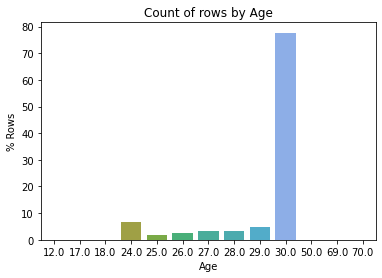

In [36]:
team_age = pd.DataFrame(cric_data_transIter['Avg_team_Age'].value_counts(normalize=True).mul(100).round(2).reset_index())
team_age.columns=['Age','% Rows']
team_age_sort = team_age.sort_values(by='Age')

sns.barplot(x='Age',y='% Rows',data=team_age_sort)
plt.title('Count of rows by Age')

90% of the matches had average team age between 24 and 30

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of matches by Match Light Type')

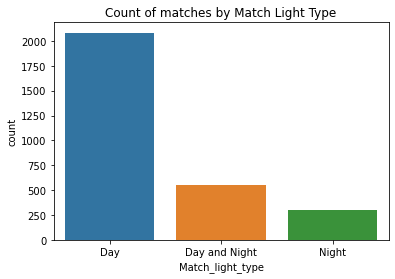

In [37]:
sns.countplot(cric_data_transIter['Match_light_type'])
plt.title('Count of matches by Match Light Type')

Most of the matches were day matches followed by Day and Night type of matches

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of matches by number of bowlers')

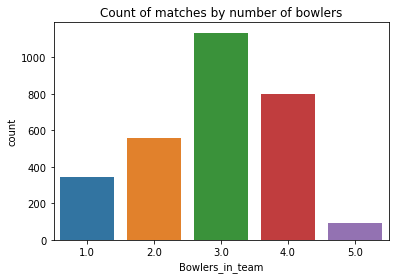

In [38]:
sns.countplot(cric_data_transIter['Bowlers_in_team'])
plt.title('Count of matches by number of bowlers')

Most of the matches had 3 or 4 bowlers in the team

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of matches by Opponents')

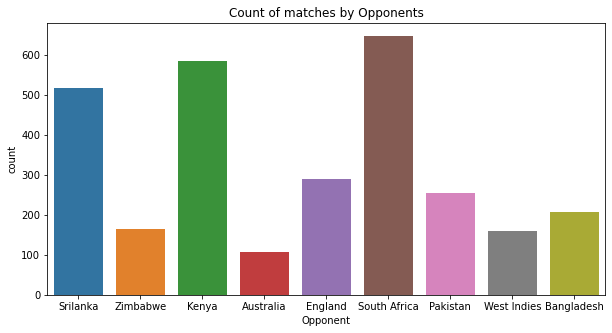

In [39]:
plt.subplots(figsize=(10,5))
sns.countplot(cric_data_transIter['Opponent'])
plt.title('Count of matches by Opponents')

Most of the matches were played against South Africa, Kenya and Srilanka

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of matches by first selection')

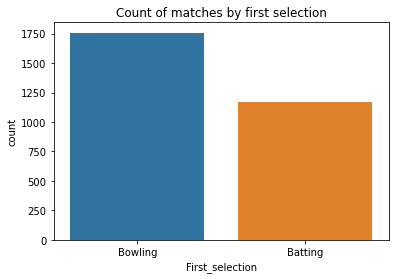

In [40]:
sns.countplot(cric_data_transIter['First_selection'])
plt.title('Count of matches by first selection')

In most of the matches, team chose to bowl

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of matches by Season')

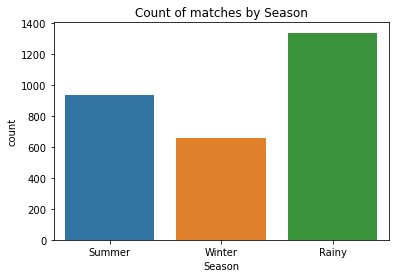

In [41]:
sns.countplot(cric_data_transIter['Season'])
plt.title('Count of matches by Season')

Most matches were played during the Rainy and Summer seasons

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of matches by Offshore/Onshore')

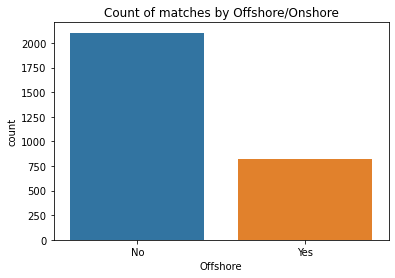

In [42]:
sns.countplot(cric_data_transIter['Offshore'])
plt.title('Count of matches by Offshore/Onshore')

Most of these matches were played in India

Text(0.5, 1.0, 'Count of matches by Max runs scored per over')

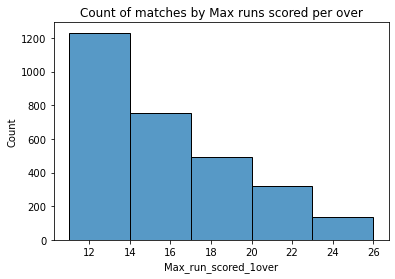

In [43]:
sns.histplot(cric_data_transIter['Max_run_scored_1over'],binwidth=3)
plt.title('Count of matches by Max runs scored per over')

In most of these matches, India scored a maximum of 11 to 14 runs per over

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of matches by Max wickets taken per over')

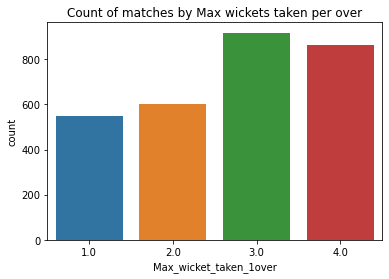

In [44]:
sns.countplot(cric_data_transIter['Max_wicket_taken_1over'])
plt.title('Count of matches by Max wickets taken per over')

There are more number of matches where India took 3 or more wickets per over

Text(0.5, 1.0, 'Count of matches by Extra Balls')

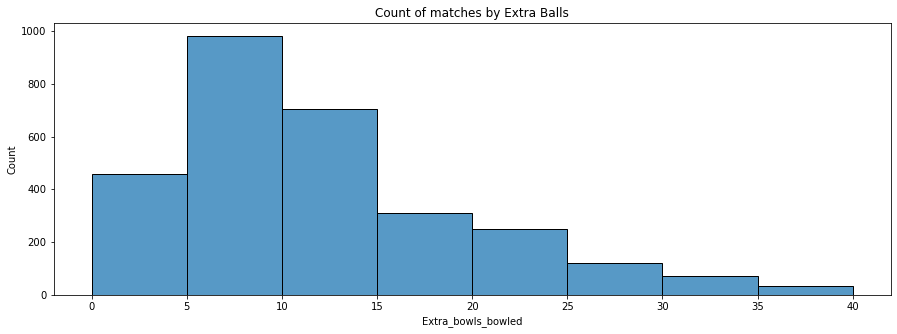

In [45]:
plt.subplots(figsize=(15,5))
sns.histplot(cric_data_transIter['Extra_bowls_bowled'],binwidth=5)
plt.title('Count of matches by Extra Balls')

In most of the matches, the Indian team bowled between 5 to 15 extra balls

Text(0.5, 1.0, 'Count of matches by Minimum runs given per over')

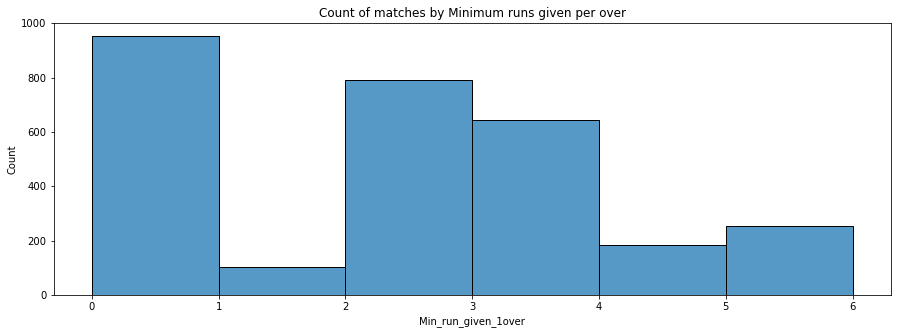

In [46]:
plt.subplots(figsize=(15,5))
sns.histplot(cric_data_transIter['Min_run_given_1over'],binwidth=1)
plt.title('Count of matches by Minimum runs given per over')

Most of the matches, the minimum runs per over is between 0 and 1. The next highest value is between 2 and 4

Text(0.5, 1.0, 'Count of matches by Minimum runs scored per over')

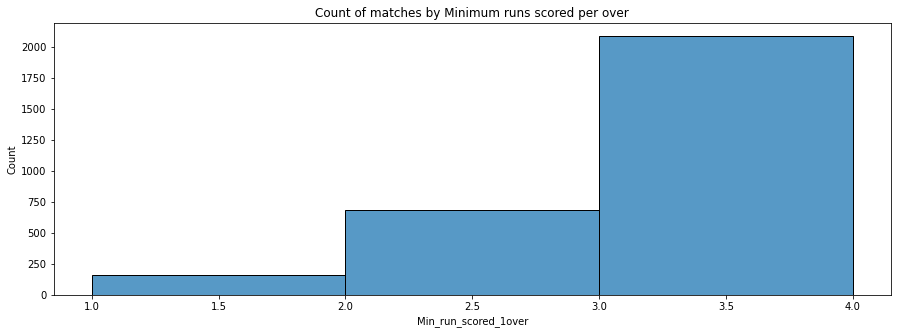

In [47]:
plt.subplots(figsize=(15,5))
sns.histplot(cric_data_transIter['Min_run_scored_1over'],binwidth=1)
plt.title('Count of matches by Minimum runs scored per over')

Minimum run scored per over ranges between 3 and 4 in most matches

Text(0.5, 1.0, 'Count of matches by Maximum runs given per over')

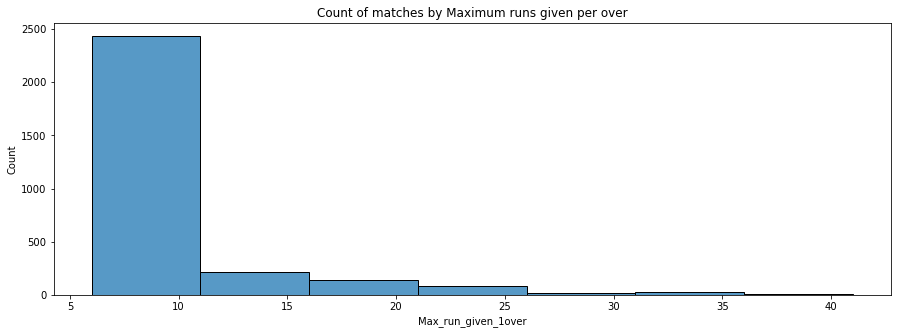

In [48]:
plt.subplots(figsize=(15,5))
sns.histplot(cric_data_transIter['Max_run_given_1over'],binwidth=5)
plt.title('Count of matches by Maximum runs given per over')

In most matches, the maximum runs given per over ranges between 6 and 11

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of matches by Extra Balls bowled by the opponent')

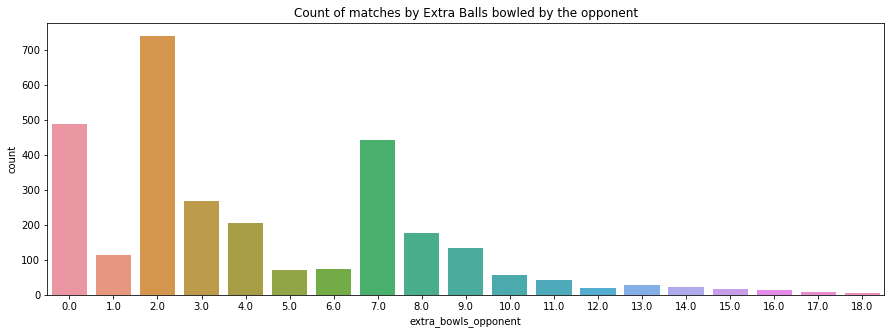

In [49]:
plt.subplots(figsize=(15,5))
sns.countplot(cric_data_transIter['extra_bowls_opponent'])
plt.title('Count of matches by Extra Balls bowled by the opponent')

In most matches, extra balls bowled are 2 followed by 7

Text(0.5, 1.0, 'Count of matches by Highest run scored by a player')

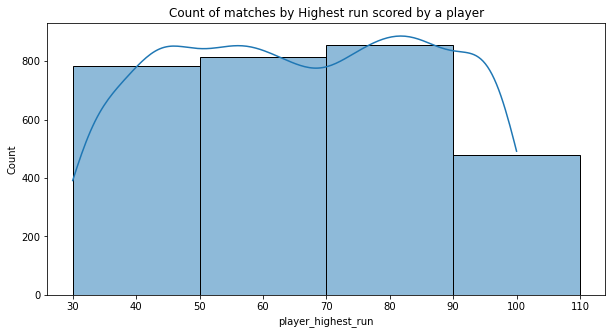

In [50]:
plt.subplots(figsize=(10,5))
sns.histplot(cric_data_transIter['player_highest_run'],binwidth=20,kde=True)
plt.title('Count of matches by Highest run scored by a player')

The highest runs scored by a payer is distributed almost equally between 30 and 90

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of matches by number of players with 0 runs')

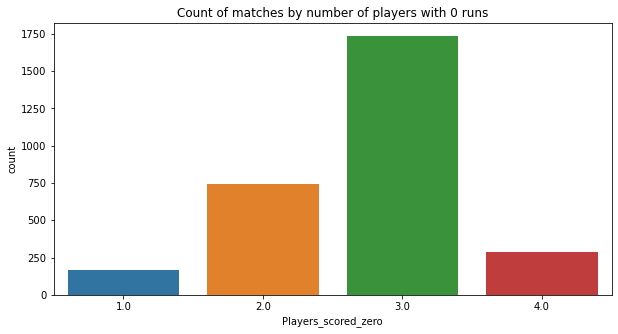

In [51]:
plt.subplots(figsize=(10,5))
sns.countplot(cric_data_transIter['Players_scored_zero'])
plt.title('Count of matches by number of players with 0 runs')

In most matches, there were around 3 players who scored 0 runs

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of matches by highest wicket taken by players')

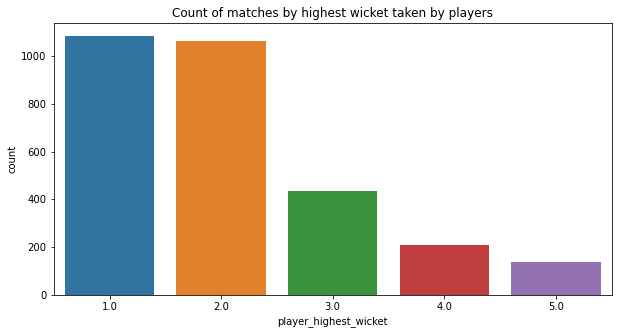

In [52]:
plt.subplots(figsize=(10,5))
sns.countplot(cric_data_transIter['player_highest_wicket'])
plt.title('Count of matches by highest wicket taken by players')

The highest number of wickets taken range from 1 to 2 in most matches

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of matches by match result')

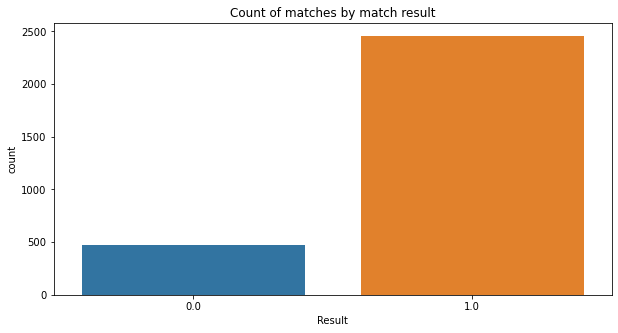

In [53]:
plt.subplots(figsize=(10,5))
sns.countplot(cric_data_transIter['Result'])
plt.title('Count of matches by match result')

The dataset is imbalanced because the team has won in most matches.The prediction for Loss will not be accurate until we balance the dataset

In [54]:
cric_data_transIter['Result'] = np.where(cric_data_transIter['Result']==1,'Win','Loss')

### Bivariate Analysis

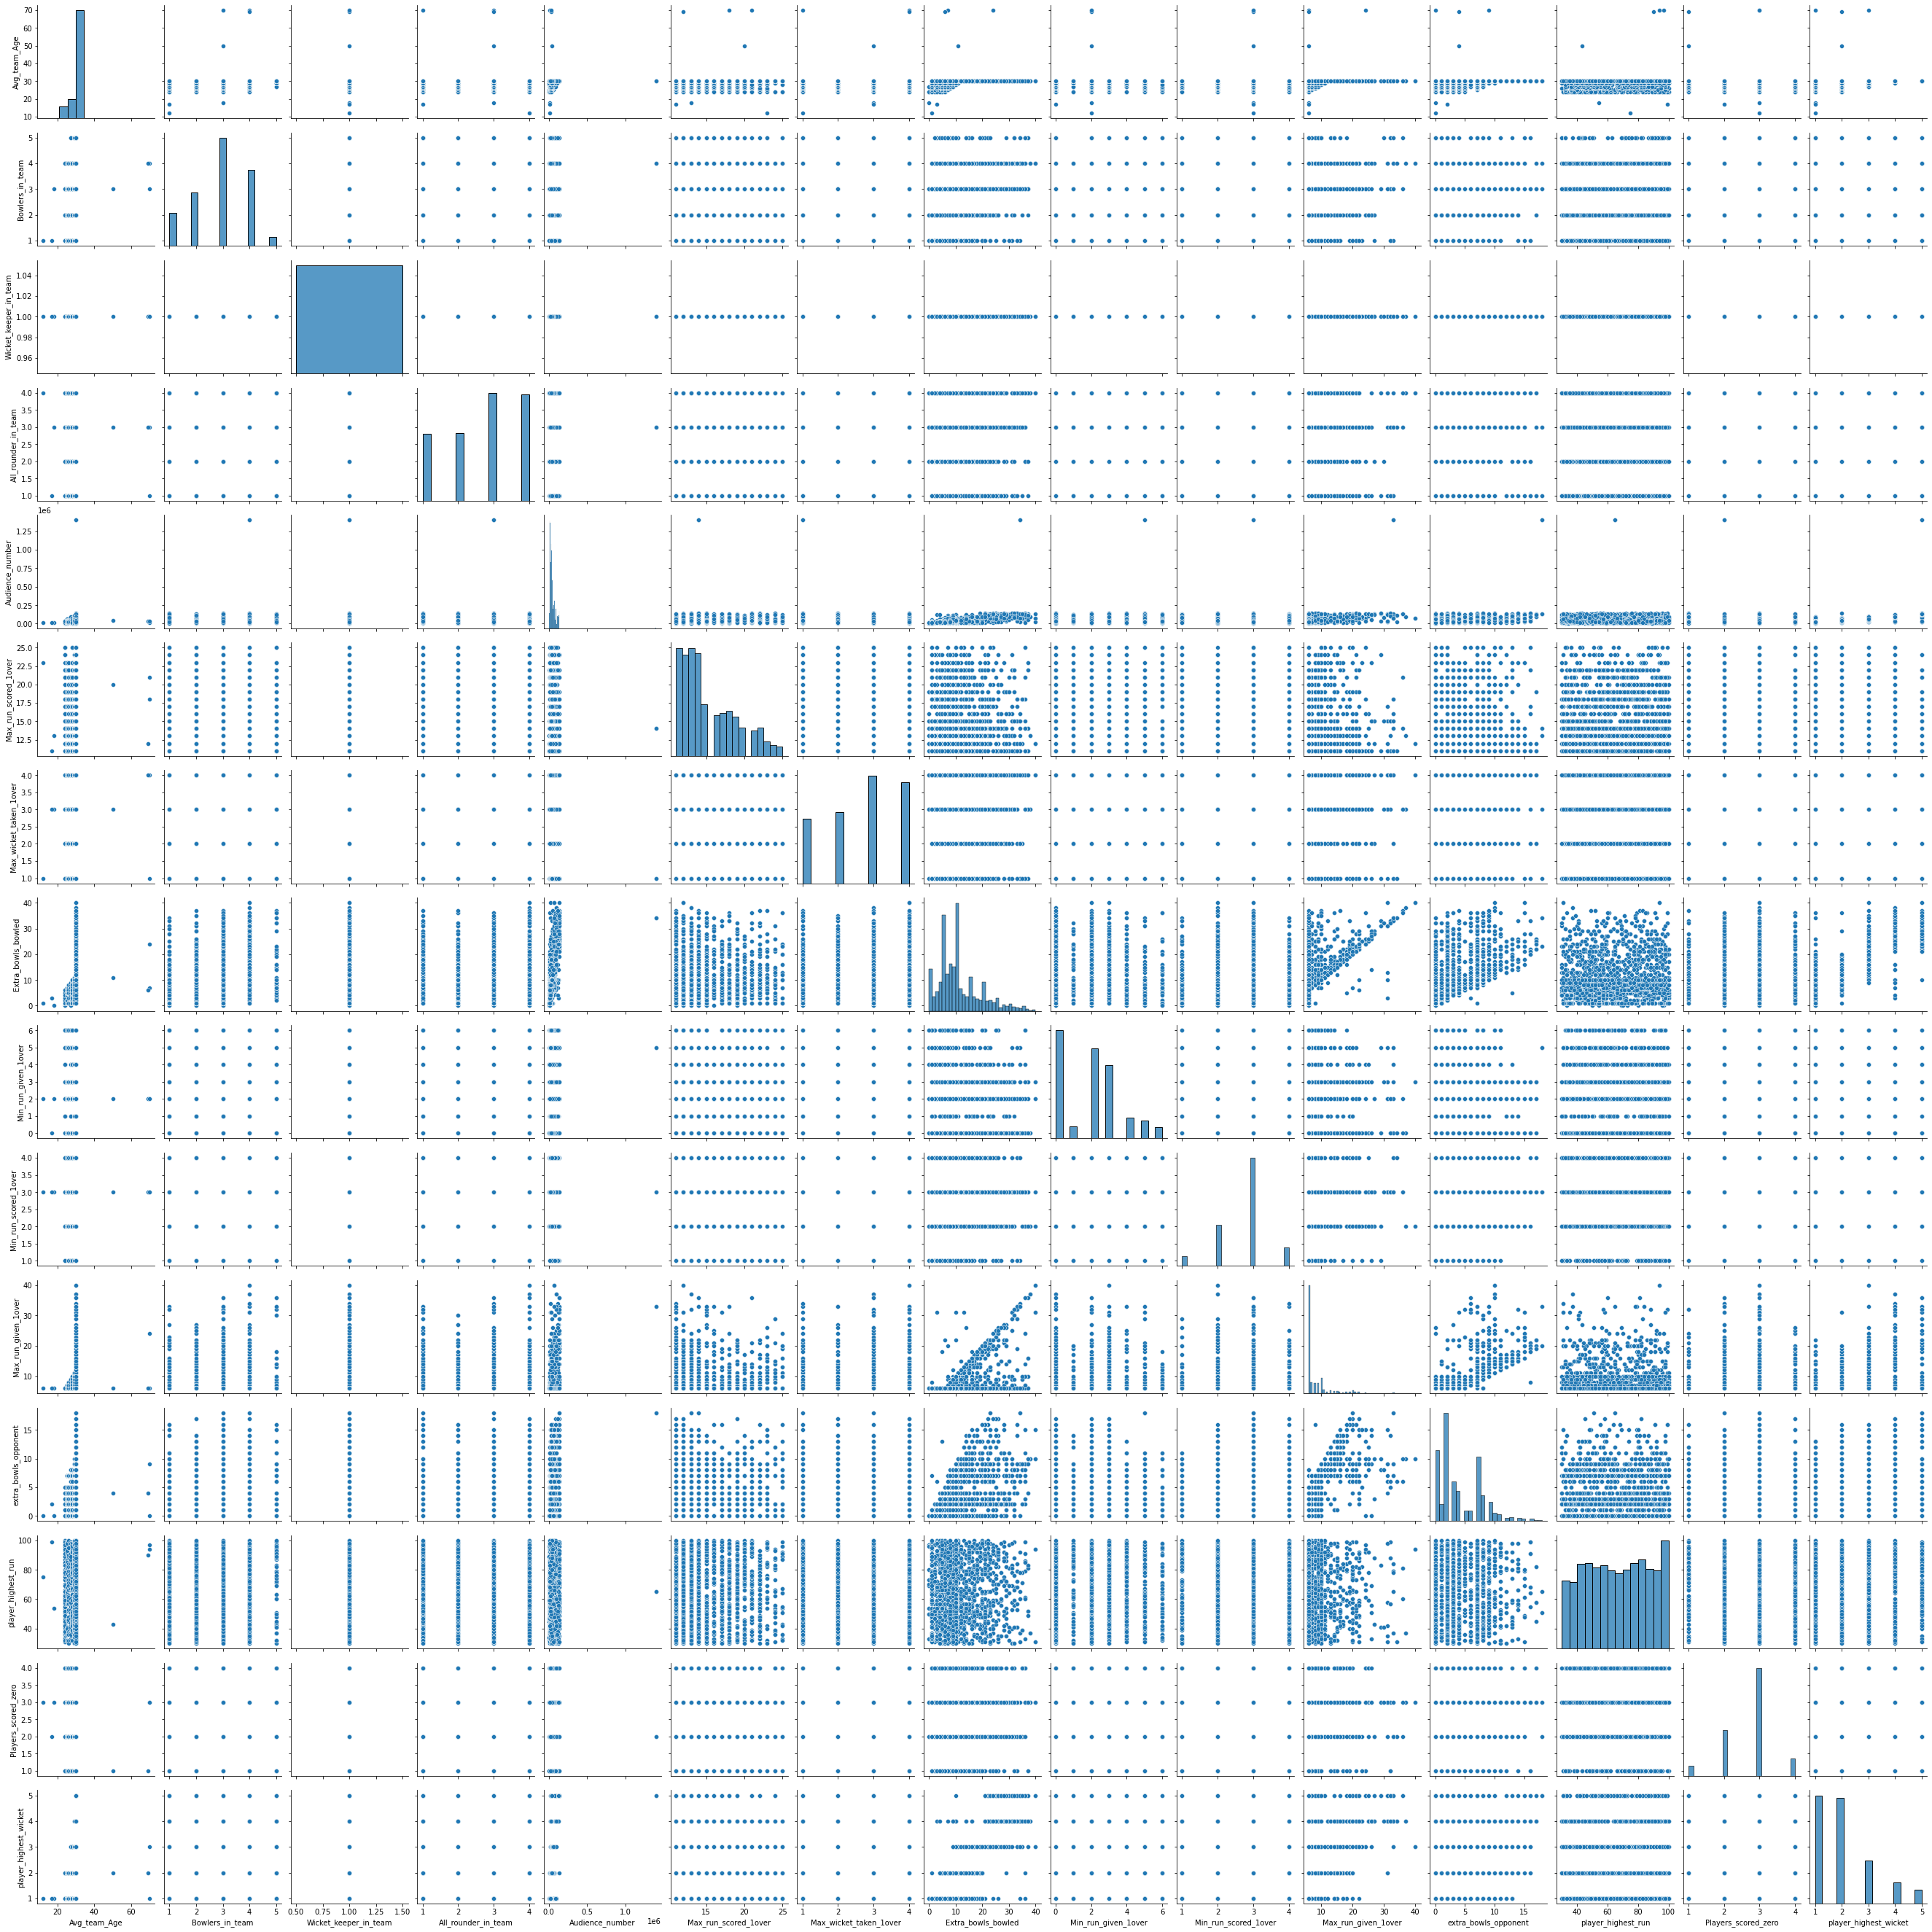

In [55]:
sns.pairplot(cric_data_transIter)

Text(0.5, 1.0, 'Losses by Match Light')

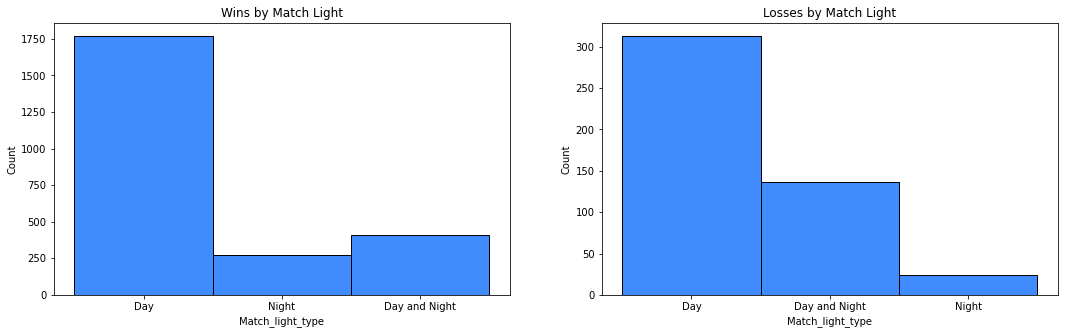

In [56]:
win_match_light = cric_data_transIter[cric_data_transIter['Result']=='Win']['Match_light_type'] # subset with wins
loss_match_light = cric_data_transIter[cric_data_transIter['Result']=='Loss']['Match_light_type'] # subset with losses

# wins histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(win_match_light, kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Wins by Match Light')

# losses histogram
sns.histplot(loss_match_light, kde=False, color='#0066ff', ax=ax2)
ax2.set_title('Losses by Match Light')

In [57]:
CrosstabResult=pd.crosstab(index=cric_data_transIter['Result'],columns=cric_data_transIter['Match_light_type'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 6.075973267507387e-11


In [58]:
pd.crosstab(index=cric_data_transIter['Result'],columns=cric_data_transIter['Match_light_type'],normalize='columns').mul(100).round(0)

Match_light_type,Day,Day and Night,Night
Result,,,
Loss,15.0,25.0,8.0
Win,85.0,75.0,92.0


When we look at the plot of wins against match light type and losses against match light type, the trend looks to be same<br>We hence conduct a Chi-Square hypotheses to check if there is a relation between match light type and result<br><b>Null Hypotheses:</b>There is no correlation between match light type and result<br><b>Alternate Hypotheses:</b>Match light type and Result are correlated<br>The p-value turns out to be far lesser than 0.05. Hence, we reject the null hypotheses and can say that there is a relation between Match light type and Result

Text(0.5, 1.0, 'Losses by Match Format')

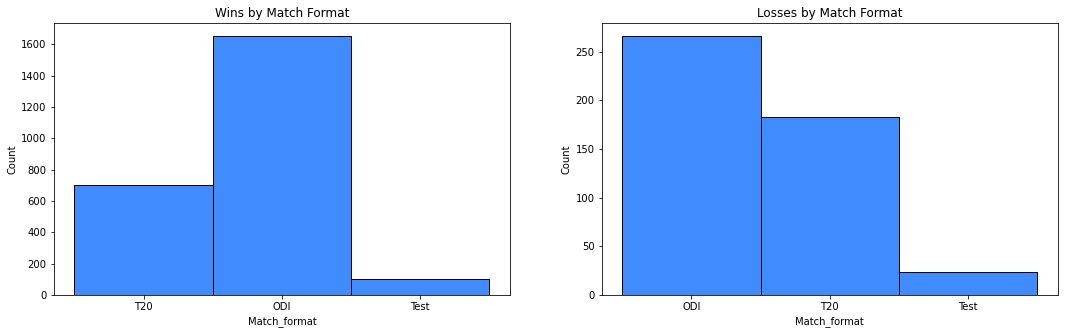

In [59]:
win_match_format = cric_data_transIter[cric_data_transIter['Result']=='Win']['Match_format'] # subset with win
loss_match_format = cric_data_transIter[cric_data_transIter['Result']=='Loss']['Match_format'] # subset with losses

# wins histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(win_match_format, kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Wins by Match Format')

# losses histogram
sns.histplot(loss_match_format, kde=False, color='#0066ff', ax=ax2)
ax2.set_title('Losses by Match Format')

In [60]:
CrosstabResult=pd.crosstab(index=cric_data_transIter['Result'],columns=cric_data_transIter['Match_format'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 2.1597336539487315e-05


In [61]:
pd.crosstab(index=cric_data_transIter['Result'],columns=[cric_data_transIter['Match_format']],normalize='columns').mul(100).round(0)

Match_format,ODI,T20,Test
Result,,,
Loss,14.0,21.0,19.0
Win,86.0,79.0,81.0


When we look at the plot of wins against match format and losses against match format, the trend looks to be same<br>We hence conduct a Chi-Square hypotheses to check if there is a relation between match format and result<br><b>Null Hypotheses:</b>There is no correlation between match format and result<br><b>Alternate Hypotheses:</b>Match format and Result are correlated<br>The p-value turns out to be far lesser than 0.05. Hence, we reject the null hypotheses and can say that there is a relation between Match format and Result

In [62]:
cric_data_transIter.columns

Index(['Avg_team_Age', 'Match_light_type', 'Match_format', 'Bowlers_in_team',
       'Wicket_keeper_in_team', 'All_rounder_in_team', 'First_selection',
       'Opponent', 'Season', 'Audience_number', 'Offshore',
       'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled',
       'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over',
       'extra_bowls_opponent', 'player_highest_run', 'Players_scored_zero',
       'player_highest_wicket', 'Result'],
      dtype='object')

Text(0.5, 1.0, 'Losses by Number of Bowlers')

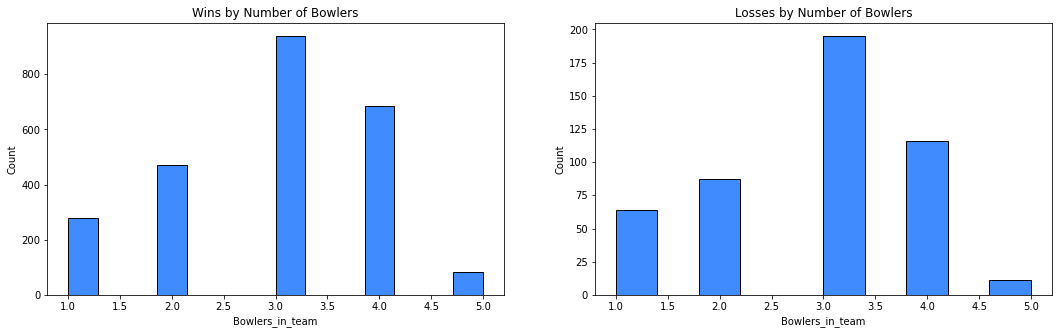

In [63]:
win_bowlers = cric_data_transIter[cric_data_transIter['Result']=='Win']['Bowlers_in_team'] # subset with males age
loss_bowlers = cric_data_transIter[cric_data_transIter['Result']=='Loss']['Bowlers_in_team'] # subset with females age

# males histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(win_bowlers, kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Wins by Number of Bowlers')

# females histogram
sns.histplot(loss_bowlers, kde=False, color='#0066ff', ax=ax2)
ax2.set_title('Losses by Number of Bowlers')

In [64]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(win_bowlers, loss_bowlers)[1]))

Kolgomorov-Smirnov test p-value: 0.40


When we look at the plot of wins against number of bowlers and losses against number of bowlers, the trend looks to be same<br>
We hence conduct a Chi-Square hypotheses to check if there is a relation between number of bowlers and result<br>
<b>Null Hypotheses:</b>There is no correlation between number of bowlers and result<br>
<b>Alternate Hypotheses:</b>Number of bowlers and Result are correlated<br>
The p-value turns out to be greater than 0.05. Hence, we fail to reject the null hypotheses and can say that there is a no relation between number of bowlers and Result

Text(0.5, 1.0, 'Losses by Number of all-rounders')

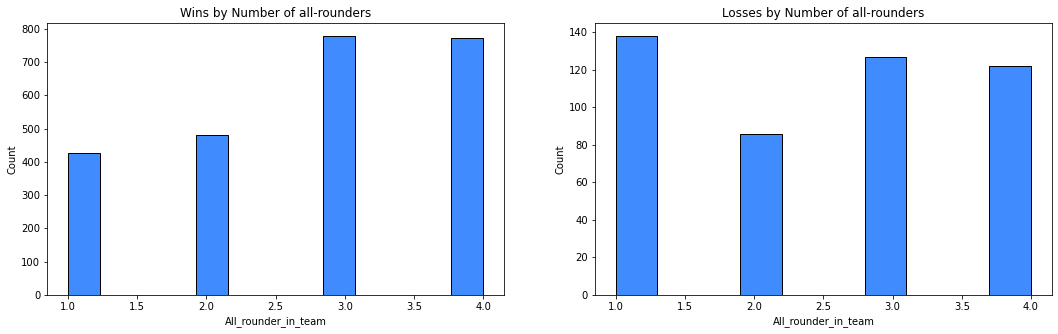

In [65]:
win_allrounder = cric_data_transIter[cric_data_transIter['Result']=='Win']['All_rounder_in_team'] # subset with males age
loss_allrounder = cric_data_transIter[cric_data_transIter['Result']=='Loss']['All_rounder_in_team'] # subset with females age

# males histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(win_allrounder, kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Wins by Number of all-rounders')

# females histogram
sns.histplot(loss_allrounder, kde=False, color='#0066ff', ax=ax2)
ax2.set_title('Losses by Number of all-rounders')

In [66]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(win_allrounder, loss_allrounder)[1]))

Kolgomorov-Smirnov test p-value: 0.00


When we look at the plot of wins against number of all-rounders and losses against number of all-rounders, we see that:<br>1. The wins are more when there are more number of all-rounders<br>2. Losses are more when there are lower number of all-rounders in the team<br>
Although it is evident that the number of all-rounders affect the result, We still conduct a Kolgomorov-Smirnov test to check if there is a relation between number of all-rounders and result<br>
<b>Null Hypotheses:</b>There is no correlation between number of all-rounders and result<br>
<b>Alternate Hypotheses:</b>Number of all-rounders and Result are correlated<br>
The p-value turns out to be 0 which is lesser than 0.05. Hence, we reject the null hypotheses and can statistically say that there is a relation between number of all-rounders and Result

In [67]:
pd.crosstab(index=[cric_data_transIter['Result']],columns=[cric_data_transIter['All_rounder_in_team']],normalize='columns').mul(100).round(0).T

Result,Loss,Win
All_rounder_in_team,,
1.0,24.0,76.0
2.0,15.0,85.0
3.0,14.0,86.0
4.0,14.0,86.0


Text(0.5, 1.0, 'Losses by Number of First Selection')

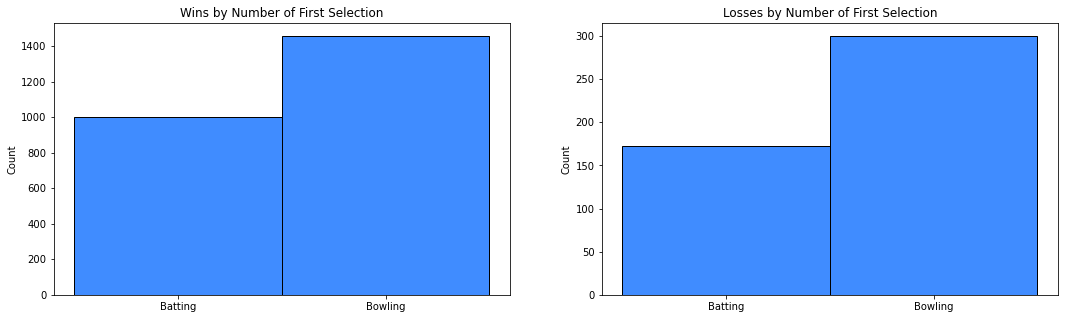

In [68]:
win_first_selection = cric_data_transIter[cric_data_transIter['Result']=='Win']['First_selection'] # subset with males age
loss_first_selection = cric_data_transIter[cric_data_transIter['Result']=='Loss']['First_selection'] # subset with females age

# males histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(sorted(win_first_selection), kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Wins by Number of First Selection')

# females histogram
sns.histplot(sorted(loss_first_selection), kde=False, color='#0066ff', ax=ax2)
ax2.set_title('Losses by Number of First Selection')

In [69]:
CrosstabResult=pd.crosstab(index=cric_data_transIter['Result'],columns=cric_data_transIter['First_selection'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.10406494542823633


When we look at the plot of wins against first selection and losses against first selection, the trend looks to be same<br>We hence conduct a Chi-Square hypotheses to check if there is a relation between first selection and result<br><b>Null Hypotheses:</b>There is no correlation between first selection and result<br><b>Alternate Hypotheses:</b>First selection and Result are correlated<br>The p-value turns out to be far greater than 0.05. Hence, we fail to reject the null hypotheses and can statistically say that there is no relation between first selection and Result

Text(0.5, 1.0, 'Losses by Opponent')

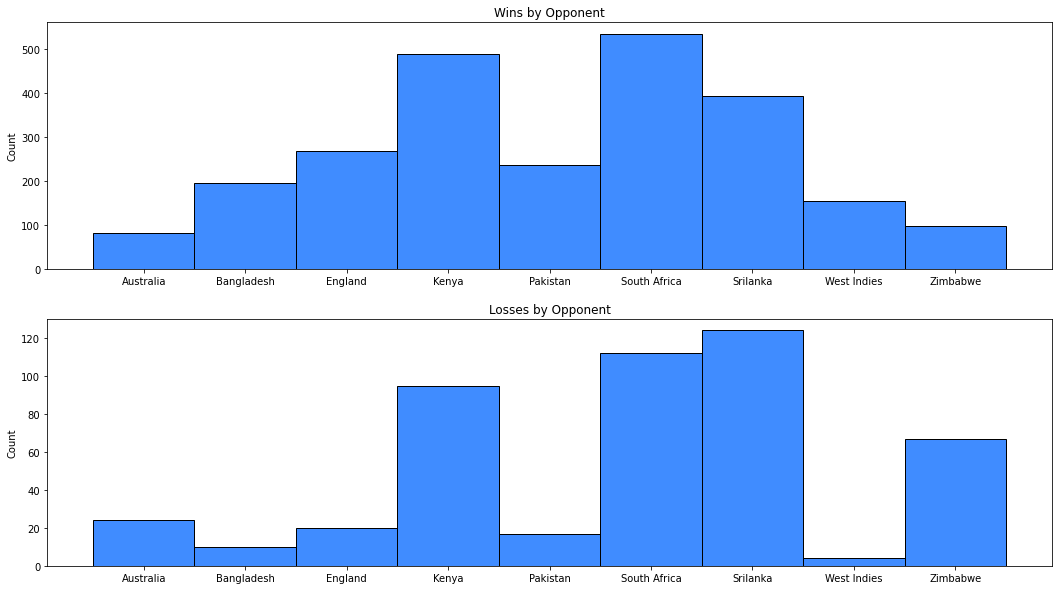

In [70]:
win_opponent = cric_data_transIter[cric_data_transIter['Result']=='Win']['Opponent'] # subset with win against opponent
loss_opponent = cric_data_transIter[cric_data_transIter['Result']=='Loss']['Opponent'] # subset with loss against opponent

# win histogram
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,10))
sns.histplot(sorted(win_opponent), kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Wins by Opponent')

# loss histogram
sns.histplot(sorted(loss_opponent), kde=False, color='#0066ff', ax=ax2)
ax2.set_title('Losses by Opponent')

In [71]:
CrosstabResult=pd.crosstab(index=cric_data_transIter['Result'],columns=cric_data_transIter['Opponent'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 4.390731235711032e-34


In [72]:
pd.crosstab(index=[cric_data_transIter['Result']],columns=[cric_data_transIter['Opponent']],normalize='columns').mul(100).round(0).T

Result,Loss,Win
Opponent,,
Australia,23.0,77.0
Bangladesh,5.0,95.0
England,7.0,93.0
Kenya,16.0,84.0
Pakistan,7.0,93.0
South Africa,17.0,83.0
Srilanka,24.0,76.0
West Indies,3.0,97.0
Zimbabwe,41.0,59.0


When we look at the plot of wins against opponent and losses against opponent, the trend looks like the losses against South Africa, Srilanka, Australia and Zimbabwe seem to be more than the wins<br>Although it is clear that Opponent is a significant factor in determining the result, we conduct a Chi-Square test to check if there is a relation between opponent and result<br><b>Null Hypotheses:</b>There is no correlation between opponent and result<br><b>Alternate Hypotheses:</b>Opponent and Result are correlated<br>The p-value turns out to be significantly lesser than 0.05. Hence, we reject the null hypotheses and can statistically say that there is a strong relation between opponent and Result

Text(0.5, 1.0, 'Losses by Number of Audience')

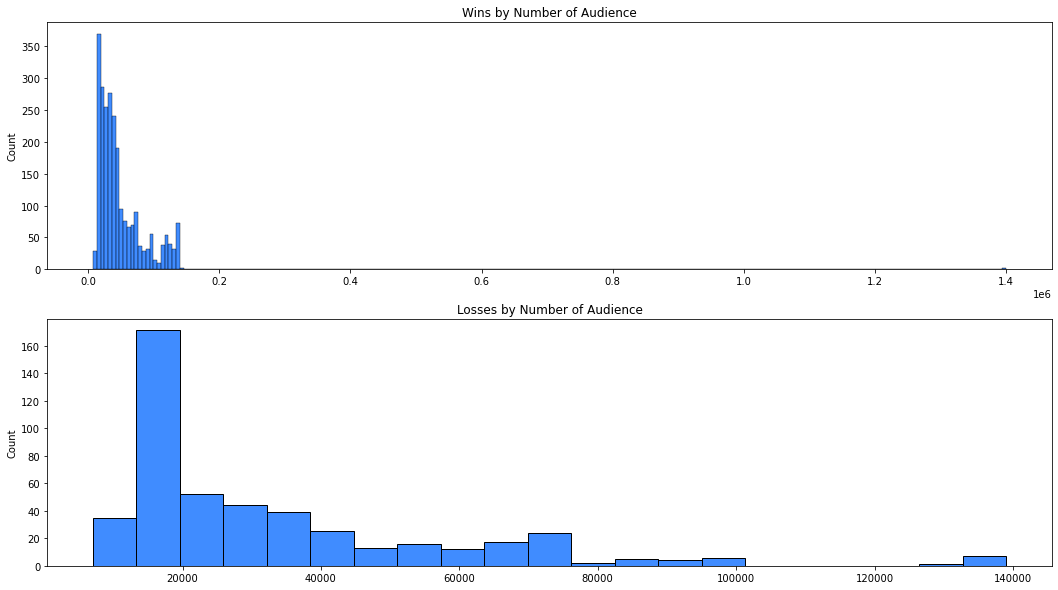

In [73]:
win_audience = cric_data_transIter[cric_data_transIter['Result']=='Win']['Audience_number'] # subset with win against audience number
loss_audience = cric_data_transIter[cric_data_transIter['Result']=='Loss']['Audience_number'] # subset with loss against audience

# win histogram
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,10))
sns.histplot(sorted(win_audience), kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Wins by Number of Audience')

# loss histogram
sns.histplot(sorted(loss_audience), kde=False, color='#0066ff', ax=ax2)
ax2.set_title('Losses by Number of Audience')

In [74]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(win_audience, loss_audience)[1]))

Kolgomorov-Smirnov test p-value: 0.00


When we look at the plot of wins against number of audience and losses against number of audience, we see that as the number of audience increase the chances of win increases:<br>
Although it is evident that the number of audience affect the result, We still conduct a Kolgomorov-Smirnov test to check if there is a relation between number of audience and result<br>
<b>Null Hypotheses:</b>There is no correlation between number of audience and result<br>
<b>Alternate Hypotheses:</b>Number of audience and Result are correlated<br>
The p-value turns out to be 0 which is lesser than 0.05. Hence, we reject the null hypotheses and can statistically say that there is a relation between number of audience and Result

In [75]:
cric_audience = cric_data_transIter[['Result','Audience_number']]
cric_audience['audience_bin'] = pd.qcut(cric_audience['Audience_number'],q=6)
pd.crosstab(index=[cric_audience['Result']],columns=[cric_audience['audience_bin']],normalize='columns').mul(100).round(0).T

<ipython-input-75-f614532c6a04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cric_audience['audience_bin'] = pd.qcut(cric_audience['Audience_number'],q=6)


Result,Loss,Win
audience_bin,,
"(7062.999, 17962.0]",33.0,67.0
"(17962.0, 25711.0]",20.0,80.0
"(25711.0, 34569.5]",13.0,87.0
"(34569.5, 45668.0]",11.0,89.0
"(45668.0, 73584.0]",15.0,85.0
"(73584.0, 1399930.0]",6.0,94.0


In [76]:
#pd.qcut(cric_data_transIter['extra_bowls_opponent'],q=3)
cric_extra_opp = cric_data_transIter[['Result','extra_bowls_opponent']]
cric_extra_opp['extra_opp_bin'] = pd.qcut(cric_extra_opp['extra_bowls_opponent'],q=4)
pd.crosstab(index=[cric_extra_opp['Result']],columns=[cric_extra_opp['extra_opp_bin']],normalize='columns').mul(100).round(0).T

<ipython-input-76-1ce72f3bbade>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cric_extra_opp['extra_opp_bin'] = pd.qcut(cric_extra_opp['extra_bowls_opponent'],q=4)


Result,Loss,Win
extra_opp_bin,,
"(-0.001, 2.0]",23.0,77.0
"(2.0, 3.0]",12.0,88.0
"(3.0, 7.0]",12.0,88.0
"(7.0, 18.0]",8.0,92.0


In [77]:
#cric_data_transIter['Max_run_given_1over'].value_counts()
cric_max_run_given = cric_data_transIter[['Result','Max_run_given_1over']]
cric_max_run_given['Max_run_given_bin'] = pd.cut(cric_max_run_given['Max_run_given_1over'],bins=5)
pd.crosstab(index=[cric_max_run_given['Result']],columns=[cric_max_run_given['Max_run_given_bin']],normalize='columns').mul(100).round(0).T

<ipython-input-77-edc3b8a93d55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cric_max_run_given['Max_run_given_bin'] = pd.cut(cric_max_run_given['Max_run_given_1over'],bins=5)


Result,Loss,Win
Max_run_given_bin,,
"(5.966, 12.8]",17.0,83.0
"(12.8, 19.6]",8.0,92.0
"(19.6, 26.4]",7.0,93.0
"(26.4, 33.2]",18.0,82.0
"(33.2, 40.0]",20.0,80.0


Text(0.5, 1.0, 'Losses by Offshore')

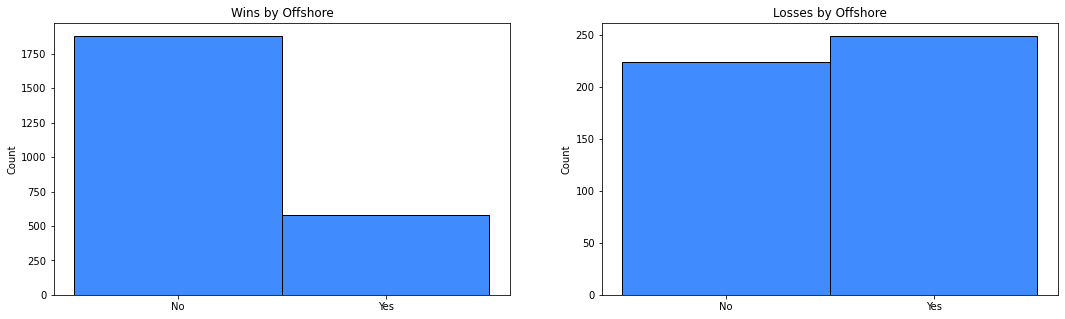

In [78]:
win_offshore = cric_data_transIter[cric_data_transIter['Result']=='Win']['Offshore'] # subset with win against offshore
loss_offshore = cric_data_transIter[cric_data_transIter['Result']=='Loss']['Offshore'] # subset with loss against offshore

# win histogram
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))
sns.histplot(sorted(win_offshore), kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Wins by Offshore')

# loss histogram
sns.histplot(sorted(loss_offshore), kde=False, color='#0066ff', ax=ax2)
ax2.set_title('Losses by Offshore')

In [79]:
CrosstabResult=pd.crosstab(index=cric_data_transIter['Result'],columns=cric_data_transIter['Offshore'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 8.474537248358428e-38


When we look at the plot of wins against games played offshore or onshore and losses against games played offshore/onshore, the trend shows that when the games are played in Indian grounds, the chances of winning are more<br>It is clear that Offshore is a significant factor in determining the result, we conduct a Chi-Square test to check if there is a relation between Offshore and result<br><b>Null Hypotheses:</b>There is no correlation between offshore and result<br><b>Alternate Hypotheses:</b>Offshore and Result are correlated<br>The p-value turns out to be significantly lesser than 0.05. Hence, we reject the null hypotheses and can statistically say that there is a strong relation between offshore and Result

In [80]:
pd.crosstab(index=[cric_data_transIter['Result']],columns=[cric_data_transIter['Offshore']],normalize='columns').mul(100).round(0).T

Result,Loss,Win
Offshore,,
No,11.0,89.0
Yes,30.0,70.0


Text(0.5, 1.0, 'Losses by maximum runs scored')

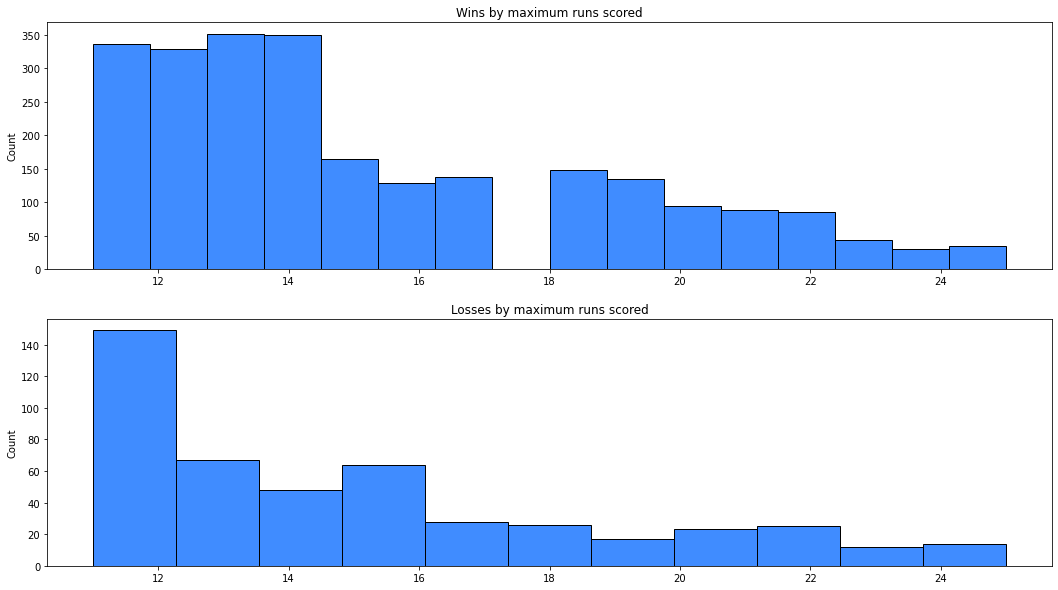

In [81]:
win_max_run_score = cric_data_transIter[cric_data_transIter['Result']=='Win']['Max_run_scored_1over'] # subset with win against opponent
loss_max_run_score = cric_data_transIter[cric_data_transIter['Result']=='Loss']['Max_run_scored_1over'] # subset with loss against opponent

# win histogram
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,10))
sns.histplot(sorted(win_max_run_score), kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Wins by maximum runs scored')

# loss histogram
sns.histplot(sorted(loss_max_run_score), kde=False, color='#0066ff', ax=ax2)
ax2.set_title('Losses by maximum runs scored')

In [82]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(win_max_run_score, loss_max_run_score)[1]))

Kolgomorov-Smirnov test p-value: 0.39


When we look at the plot of wins against maximum runs per over and losses against maximum runs per over, the trend shows that there are more number of matches where there are lesser runs scored per over and yet the match was won. On the other hand, there are more matches with more runs per over and still lost<br>
Kolgomorov-Smirnov test is conducted to prove that there is no relation between maximum runs per over and result<br>
<b>Null Hypotheses:</b>There is no correlation between maximum runs per over and result<br>
<b>Alternate Hypotheses:</b>Maximum runs per over and Result are correlated<br>
The p-value turns out to be much higher than 0.05. Hence, we accept the null hypotheses and can statistically say that there is no relation between maximum runs scored per over and Result

Text(0.5, 1.0, 'Losses by maximum wickets taken per over')

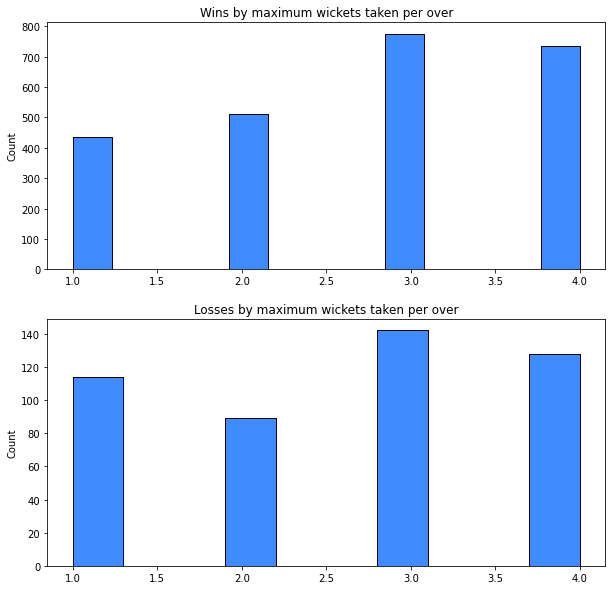

In [83]:
win_max_wicket = cric_data_transIter[cric_data_transIter['Result']=='Win']['Max_wicket_taken_1over'] # subset with win against opponent
loss_max_wicket = cric_data_transIter[cric_data_transIter['Result']=='Loss']['Max_wicket_taken_1over'] # subset with loss against opponent

# win histogram
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
sns.histplot(sorted(win_max_wicket), kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Wins by maximum wickets taken per over')

# loss histogram
sns.histplot(sorted(loss_max_wicket), kde=False, color='#0066ff', ax=ax2)
ax2.set_title('Losses by maximum wickets taken per over')

In [84]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(win_max_wicket, loss_max_wicket)[1]))

Kolgomorov-Smirnov test p-value: 0.07


When we look at the plot of wins against maximum wickets taken per over and losses against maximum wickets taken per over, there does not seem to be a trend or relation<br>
Kolgomorov-Smirnov test is conducted to prove that there is no relation between maximum wickets taken per over and result<br>
<b>Null Hypotheses:</b>There is no correlation between maximum wickets taken per over and result<br>
<b>Alternate Hypotheses:</b>Maximum wickets taken per over and Result are correlated<br>
The p-value turns out to be higher than 0.05. Hence, we accept the null hypotheses and can statistically say that there is no relation between maximum wickets taken per over and Result

Text(0.5, 1.0, 'Losses by extra balls bowled')

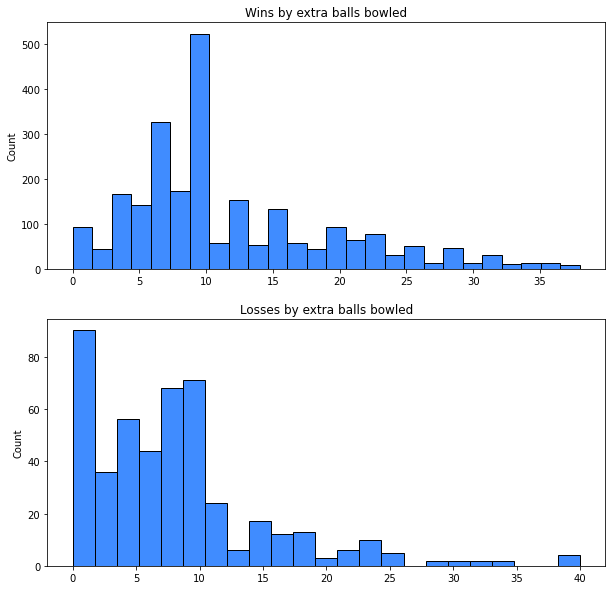

In [85]:
win_extra_bowled = cric_data_transIter[cric_data_transIter['Result']=='Win']['Extra_bowls_bowled'] # subset with win against opponent
loss_extra_bowled = cric_data_transIter[cric_data_transIter['Result']=='Loss']['Extra_bowls_bowled'] # subset with loss against opponent

# win histogram
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
sns.histplot(sorted(win_extra_bowled), kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Wins by extra balls bowled')

# loss histogram
sns.histplot(sorted(loss_extra_bowled), kde=False, color='#0066ff', ax=ax2)
ax2.set_title('Losses by extra balls bowled')

In [86]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(win_extra_bowled, loss_extra_bowled)[1]))

Kolgomorov-Smirnov test p-value: 0.00


When we look at the plot of wins against extras bowled and losses against extras bowled, there does not seem to be a trend or relation<br>
Kolgomorov-Smirnov test is conducted to prove that there is no relation between extras bowled and result<br>
<b>Null Hypotheses:</b>There is no correlation between extras bowled and result<br>
<b>Alternate Hypotheses:</b>Extras bowled and Result are correlated<br>
The p-value turns out to be 0 which is lesser than 0.05. Hence, we reject the null hypotheses and can statistically say that there is a relation between extras bowled and Result

In [87]:
cric_extra_balls = cric_data_transIter[['Result','Extra_bowls_bowled']]
bins=[-1,10,20,30,40]
labels=['<=10','11-20','21-30','>30']
cric_extra_balls['Extra_balls_bin'] = pd.cut(cric_extra_balls['Extra_bowls_bowled'],bins=bins,labels=labels)
pd.crosstab(index=[cric_extra_balls['Result']],columns=[cric_extra_balls['Extra_balls_bin']],normalize='columns').mul(100).round(0).T

<ipython-input-87-0a84739397df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cric_extra_balls['Extra_balls_bin'] = pd.cut(cric_extra_balls['Extra_bowls_bowled'],bins=bins,labels=labels)


Result,Loss,Win
Extra_balls_bin,,
<=10,20.0,80.0
11-20,11.0,89.0
21-30,7.0,93.0
>30,11.0,89.0


Text(0.5, 1.0, 'Losses by max_run_giver_per_over')

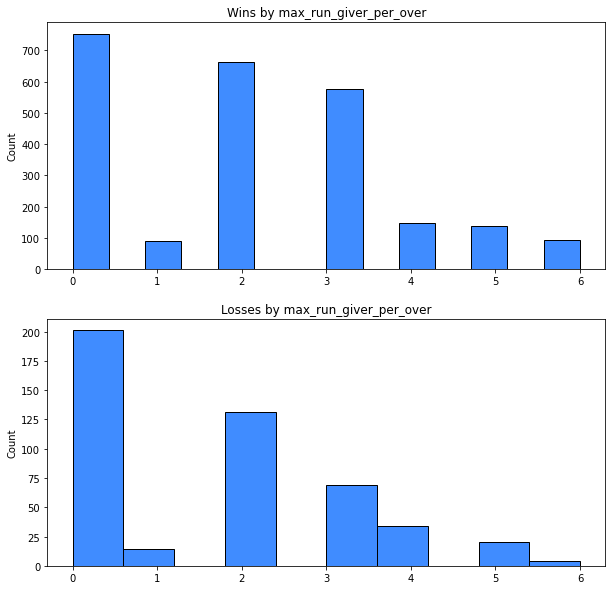

In [88]:
win_max_run_giver_per_over = cric_data_transIter[cric_data_transIter['Result']=='Win']['Min_run_given_1over'] # subset with win against opponent
loss_max_run_giver_per_over = cric_data_transIter[cric_data_transIter['Result']=='Loss']['Min_run_given_1over'] # subset with loss against opponent

# win histogram
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
sns.histplot(sorted(win_max_run_giver_per_over), kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Wins by max_run_giver_per_over')

# loss histogram
sns.histplot(sorted(loss_max_run_giver_per_over), kde=False, color='#0066ff', ax=ax2)
ax2.set_title('Losses by max_run_giver_per_over')

In [89]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(win_max_run_giver_per_over, loss_max_run_giver_per_over)[1]))

Kolgomorov-Smirnov test p-value: 0.00


When we look at the plot of wins against maximum runs given per over and losses against maximum runs given per over, there does not seem to be a trend or relation<br>
Kolgomorov-Smirnov test is conducted to prove that there is no relation between maximum runs given per over and result<br>
<b>Null Hypotheses:</b>There is no correlation between maximum runs given per over and result<br>
<b>Alternate Hypotheses:</b>maximum runs given per over and Result are correlated<br>
The p-value turns out to be 0 which is lesser than 0.05. Hence, we reject the null hypotheses and can statistically say that there is a relation between maximum runs given per over and Result

In [90]:
from sklearn.cluster import KMeans 

cric_data_transIter['Match_light_type'] = cric_data_transIter['Match_light_type'].replace({'Day':1,'Day and Night':2,'Night':3})
cric_data_transIter['First_selection'] = cric_data_transIter['First_selection'].replace({'Bowling':1,'Batting':2})
cric_data_transIter['Season'] = cric_data_transIter['Season'].replace({'Summer':1,'Winter':2,'Rainy':3})
cric_data_transIter['Offshore'] = cric_data_transIter['Offshore'].replace({'No':0,'Yes':1})
cric_data_transIter['Match_format'] = cric_data_transIter['Match_format'].replace({'ODI':1,'T20':2,'Test':3})
cric_data_transIter['Opponent'] = cric_data_transIter['Opponent'].replace({'Srilanka':1,'Zimbabwe':2,'Kenya':3,'Australia':4,'England':5,'South Africa':6,'Pakistan':7,'West Indies':8,'Bangladesh':9})
cric_data_transIter['Result'] = cric_data_transIter['Result'].replace({'Loss':0,'Win':1})

wss=[]
for i in range(1,15):
    KM = KMeans(n_clusters=i,random_state=0)
    KM.fit(cric_data_transIter)
    wss.append(KM.inertia_)

wss

[6780244696716.554,
 3113202933889.717,
 798373580028.9551,
 354158028445.87744,
 177698355324.93375,
 112839905338.7312,
 73035090315.40524,
 56796337291.91552,
 41656325395.84851,
 31959106782.23765,
 26533812924.132263,
 22019844716.44295,
 19085370032.73317,
 17104980341.19627]

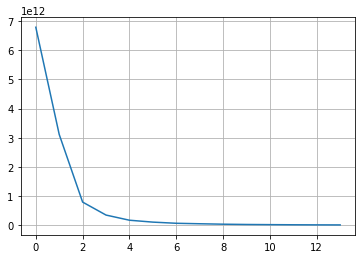

In [91]:
plt.plot(wss)
plt.grid()

It looks like 2 clusters is the optimum clusters for the dataset. Hence, we will perform the further clustering and profiling for 2 clusters

In [92]:
k_means3 = KMeans(n_clusters = 3,random_state=0)
k_means3.fit(cric_data_transIter)
labels3 = k_means3.labels_
labels3

array([0, 0, 0, ..., 0, 0, 0])

Add the cluster labels to the dataset which has the cluster labels of Hierarchical Clustering

In [93]:
cric_data_transIter['k_cluster3'] = labels3
cric_data_transIter.head()

,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,...,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Result,k_cluster3
0,18.0,1,1,3.0,1.0,3.0,1,1,1,9940.0,...,0.0,2.0,3.0,6.0,0.0,54.0,3.0,1.0,0,0
1,24.0,1,2,3.0,1.0,4.0,2,2,1,8400.0,...,0.0,0.0,3.0,6.0,0.0,69.0,2.0,1.0,1,0
2,24.0,2,2,3.0,1.0,2.0,1,2,1,13146.0,...,0.0,0.0,3.0,6.0,0.0,69.0,3.0,1.0,0,0
3,24.0,3,1,2.0,1.0,2.0,1,3,1,7357.0,...,0.0,2.0,3.0,6.0,0.0,73.0,3.0,1.0,1,0
4,24.0,3,1,1.0,1.0,3.0,1,1,1,13328.0,...,0.0,0.0,3.0,6.0,0.0,80.0,3.0,1.0,0,0


In [94]:
cric_data_transIter['Match_light_type'] = cric_data_transIter['Match_light_type'].replace({1:'Day',2:'Day and Night',3:'Night'})
cric_data_transIter['First_selection'] = cric_data_transIter['First_selection'].replace({1:'Bowling',2:'Batting'})

cric_data_transIter['Season'] = cric_data_transIter['Season'].replace({1:'Summer',2:'Winter',3:'Rainy'})
cric_data_transIter['Offshore'] = cric_data_transIter['Offshore'].replace({0:'No',1:'Yes'})
cric_data_transIter['Match_format'] = cric_data_transIter['Match_format'].replace({1:'ODI',2:'T20',3:'Test'})
cric_data_transIter['Opponent'] = cric_data_transIter['Opponent'].replace({1:'Srilanka',2:'Zimbabwe',3:'Kenya',4:'Australia',5:'England',6:'South Africa',7:'Pakistan',8:'West Indies',9:'Bangladesh'})
cric_data_transIter['Result'] = cric_data_transIter['Result'].replace({0:'Loss',1:'Win'})

In [95]:
cric_data_transIter['k_cluster3'].value_counts()

0    2279
1     649
2       2
Name: k_cluster3, dtype: int64

In [96]:
cric_data_transIter[cric_data_transIter['k_cluster3']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2279.0,29.034664,2.508831,12.0,29.0,30.0,30.0,70.0
Bowlers_in_team,2279.0,2.875384,1.028268,1.0,2.0,3.0,4.0,5.0
Wicket_keeper_in_team,2279.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
All_rounder_in_team,2279.0,2.738482,1.091538,1.0,2.0,3.0,4.0,4.0
Audience_number,2279.0,30387.376262,13113.157189,7063.0,18844.0,29134.0,39039.0,63658.0
Max_run_scored_1over,2279.0,15.245722,3.620883,11.0,12.0,14.0,18.0,25.0
Max_wicket_taken_1over,2279.0,2.694603,1.098215,1.0,2.0,3.0,4.0,4.0
Extra_bowls_bowled,2279.0,8.595875,5.257079,0.0,5.0,8.0,10.0,40.0
Min_run_given_1over,2279.0,1.962264,1.681740,0.0,0.0,2.0,3.0,6.0
Min_run_scored_1over,2279.0,2.756911,0.707829,1.0,2.0,3.0,3.0,4.0


In [97]:
cric_data_transIter[cric_data_transIter['Avg_team_Age']==70]

,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,...,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Result,k_cluster3
770,70.0,Day,ODI,4.0,1.0,3.0,Bowling,Srilanka,Rainy,15666.0,...,7.0,2.0,3.0,6.0,0.0,94.0,3.0,1.0,Win,0
899,70.0,Day and Night,ODI,3.0,1.0,1.0,Bowling,Srilanka,Winter,36470.0,...,24.0,2.0,3.0,24.0,9.0,97.0,3.0,3.0,Win,0


In [98]:
cric_data_transIter[cric_data_transIter['k_cluster3']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,649.0,29.953775,0.325399,27.0,30.0,30.0,30.0,30.0
Bowlers_in_team,649.0,3.047766,1.008849,1.0,3.0,3.0,4.0,5.0
Wicket_keeper_in_team,649.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
All_rounder_in_team,649.0,2.682589,1.100374,1.0,2.0,3.0,4.0,4.0
Audience_number,649.0,98081.427581,25051.146197,64267.0,73584.0,94472.0,121296.0,139811.0
Max_run_scored_1over,649.0,15.104777,3.821817,11.0,12.0,14.0,18.0,25.0
Max_wicket_taken_1over,649.0,2.787365,1.011246,1.0,2.0,3.0,4.0,4.0
Extra_bowls_bowled,649.0,20.722650,7.951636,3.0,15.0,21.0,26.0,40.0
Min_run_given_1over,649.0,1.909091,1.660933,0.0,0.0,2.0,3.0,6.0
Min_run_scored_1over,649.0,2.776579,0.698990,1.0,2.0,3.0,3.0,4.0


In [99]:
cric_data_transIter[cric_data_transIter['k_cluster3']==0]['Result'].value_counts(normalize=True)

Win     0.820535
Loss    0.179465
Name: Result, dtype: float64

In [100]:
cric_data_transIter[cric_data_transIter['k_cluster3']==0]['Opponent'].value_counts(normalize=True).reset_index().sort_values(by='index')

,index,Opponent
6,Australia,0.042563
7,Bangladesh,0.002633
3,England,0.094340
0,Kenya,0.254059
4,Pakistan,0.081615
2,South Africa,0.225099
1,Srilanka,0.225538
8,West Indies,0.002194
5,Zimbabwe,0.071961


In [101]:
cric_data_transIter[cric_data_transIter['k_cluster3']==1]['Opponent'].value_counts(normalize=True).reset_index().sort_values(by='index')

,index,Opponent
5,Australia,0.013867
0,Bangladesh,0.306626
3,England,0.115562
6,Kenya,0.007704
4,Pakistan,0.106317
2,South Africa,0.206471
7,Srilanka,0.004622
1,West Indies,0.237288
8,Zimbabwe,0.001541


In [102]:
cric_data_transIter.columns

Index(['Avg_team_Age', 'Match_light_type', 'Match_format', 'Bowlers_in_team',
       'Wicket_keeper_in_team', 'All_rounder_in_team', 'First_selection',
       'Opponent', 'Season', 'Audience_number', 'Offshore',
       'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled',
       'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over',
       'extra_bowls_opponent', 'player_highest_run', 'Players_scored_zero',
       'player_highest_wicket', 'Result', 'k_cluster3'],
      dtype='object')

In [103]:
cric_data_transIter[cric_data_transIter['k_cluster3']==1]['extra_bowls_opponent'].value_counts(normalize=True).reset_index().sort_values(by='index')

,index,extra_bowls_opponent
2,0.0,0.117103
9,1.0,0.029276
1,2.0,0.149461
6,3.0,0.060092
8,4.0,0.050847
17,5.0,0.009245
5,6.0,0.066256
0,7.0,0.161787
3,8.0,0.093991
4,9.0,0.078582


In [104]:
cric_data_transIter[cric_data_transIter['k_cluster3']==0]['extra_bowls_opponent'].value_counts(normalize=True).reset_index().sort_values(by='index')

,index,extra_bowls_opponent
1,0.0,0.180781
6,1.0,0.041685
0,2.0,0.282141
3,3.0,0.100921
4,4.0,0.075910
8,5.0,0.028960
9,6.0,0.013164
2,7.0,0.148311
5,8.0,0.051338
7,9.0,0.035981


Is there a correlation between any of the variables?

<AxesSubplot:>

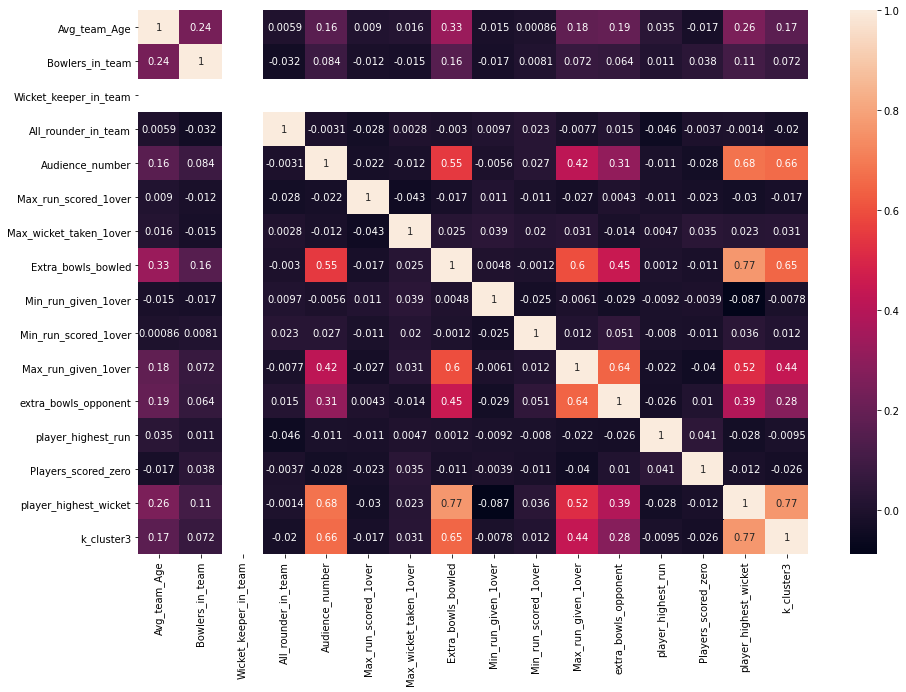

In [105]:
plt.subplots(figsize=(15,10))
sns.heatmap(cric_data_transIter.corr(),annot=True)

There is no correlation between any of the variables except one - Player with highest wicket and extra balls bowled are related<br>Since there is no correlation between variables, it does not make sense to use linear regression or logistic regression

### Model creation

Before getting into model creation, we will encode the categorical variables

In [106]:
cric_data_transIter

,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,...,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Result,k_cluster3
0,18.0,Day,ODI,3.0,1.0,3.0,Bowling,Srilanka,Summer,9940.0,...,0.0,2.0,3.0,6.0,0.0,54.0,3.0,1.0,Loss,0
1,24.0,Day,T20,3.0,1.0,4.0,Batting,Zimbabwe,Summer,8400.0,...,0.0,0.0,3.0,6.0,0.0,69.0,2.0,1.0,Win,0
2,24.0,Day and Night,T20,3.0,1.0,2.0,Bowling,Zimbabwe,Summer,13146.0,...,0.0,0.0,3.0,6.0,0.0,69.0,3.0,1.0,Loss,0
3,24.0,Night,ODI,2.0,1.0,2.0,Bowling,Kenya,Summer,7357.0,...,0.0,2.0,3.0,6.0,0.0,73.0,3.0,1.0,Win,0
4,24.0,Night,ODI,1.0,1.0,3.0,Bowling,Srilanka,Summer,13328.0,...,0.0,0.0,3.0,6.0,0.0,80.0,3.0,1.0,Loss,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,30.0,Day,T20,3.0,1.0,4.0,Batting,South Africa,Summer,33950.0,...,8.0,0.0,3.0,6.0,3.0,50.0,3.0,2.0,Win,0
2926,30.0,Day,ODI,4.0,1.0,3.0,Bowling,Kenya,Summer,19663.0,...,8.0,2.0,3.0,6.0,2.0,52.0,2.0,1.0,Win,0
2927,30.0,Day and Night,ODI,4.0,1.0,3.0,Bowling,Pakistan,Rainy,39823.0,...,10.0,2.0,4.0,10.0,2.0,80.0,3.0,2.0,Win,0
2928,30.0,Day,ODI,4.0,1.0,3.0,Batting,Kenya,Rainy,14007.0,...,20.0,2.0,3.0,6.0,3.0,98.0,3.0,1.0,Win,0


In [107]:
cric_data_transIter.drop('k_cluster3',inplace=True,axis=1)

In [108]:
cric_data_transIter['Result'] = np.where(cric_data_transIter['Result']=='Win',1,0)

In [110]:
cric_data_transformed = cric_data_transIter.copy()

cric_data_transformed['Match_light_type'] = cric_data_transformed['Match_light_type'].replace({'Day':1,'Day and Night':2,'Night':3})
cric_data_transformed['First_selection'] = cric_data_transformed['First_selection'].replace({'Bowling':1,'Batting':2})
cric_data_transformed['Season'] = cric_data_transformed['Season'].replace({'Summer':1,'Winter':2,'Rainy':3})
cric_data_transformed['Offshore'] = cric_data_transformed['Offshore'].replace({'No':0,'Yes':1})
cric_data_transformed['Match_format'] = cric_data_transformed['Match_format'].replace({'ODI':1,'T20':2,'Test':3})
cric_data_transformed['Opponent'] = cric_data_transformed['Opponent'].replace({'Srilanka':1,'Zimbabwe':2,'Kenya':3,'Australia':4,'England':5,'South Africa':6,'Pakistan':7,'West Indies':8,'Bangladesh':9})

Separate the target column from the dataset

In [112]:
win_loss_target = cric_data_transformed.pop('Result')

Divide the dataset into train, test and validation sets<br>We need the validation test to check the behaviour of the model on an unseen data apart from the train data. 70% of data will be training data

In [113]:
x_train, x_test, y_train, y_test = train_test_split(cric_data_transformed, win_loss_target, test_size = 0.35, random_state = 0, stratify = win_loss_target)

In [114]:
x_test1, x_val, y_test1, y_val = train_test_split(x_test, y_test, test_size = 0.1, random_state = 0, stratify = y_test)

In [115]:
sm = SMOTE(random_state=0)
x_balanced, y_balanced = sm.fit_sample(x_train, y_train)

We will start modeling with different algorithms starting from the basic and evaluate how they work<br>We will not start with Linear regression and Logistic Regression as there is no linear relationship existing between variables<br>We will start with Random Forest because it is an ensemble method and opinion of many models put together is better thabn 1

#### Random Forest Classification

Random Forest model, since it is a tree based model, is prone to overfitting<br>We need to prune the branches to the best extent that it could predict which is done by hyper parameter tuning

In [116]:
### Building a random forest model
param_grid = {
    'n_estimators': [100,200,300,400],  #number of trees to be built before voting
    'criterion':['gini','entropy'],
    'max_depth': [10,15,20,25,30], 
    'min_samples_split': [50,100,150,200,250,300], #Minimum number of samples that should be in a split
    'min_samples_leaf': [50,100,150,200,300,400], #Number of leaves in the terminal node. Higher the better
    'max_features': [5,10,15,20,25,'sqrt','log2','auto'] #Maximum number of features allowed in an individual tree
}

rfcl = RandomForestClassifier(random_state=0)

#pprint(rfcl.get_params())
grid_search_rfcl = RandomizedSearchCV(estimator = rfcl, param_distributions = param_grid, cv = 10,scoring='f1')

grid_search_rfcl.fit(x_balanced, y_balanced)
grid_search_rfcl.best_params_

best_grid_rf = grid_search_rfcl.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

In [117]:
best_grid_rf

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=250, n_estimators=200, random_state=0)

rf_train_precision  0.84
rf_train_recall  0.86
rf_train_f1  0.85
rf_train_acc  0.8459611772072636
Area under Curve is 0.9159703404434348
rf_test_precision  0.9
rf_test_recall  0.83
rf_test_f1  0.87
rf_test_acc  0.7843986998916577
Area under Curve is 0.7647798414928118
rf_val_precision  0.9
rf_val_recall  0.88
rf_val_f1  0.89
rf_val_acc  0.8252427184466019
Area under Curve is 0.7941176470588235


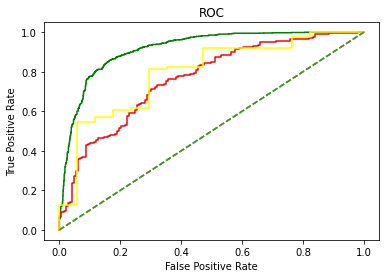

In [118]:
ytrain_predict_RF = best_grid_rf.predict(x_balanced)
ytest_predict_RF = best_grid_rf.predict(x_test1)
yval_predict_RF = best_grid_rf.predict(x_val)

rf_train_acc=best_grid_rf.score(x_balanced,y_balanced)

rf_metrics=classification_report(y_balanced, ytrain_predict_RF,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)
print ('rf_train_acc ',rf_train_acc)

rf_train_fpr, rf_train_tpr,_=roc_curve(y_balanced,best_grid_rf.predict_proba(x_balanced)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_balanced,best_grid_rf.predict_proba(x_balanced)[:,1])
print('Area under Curve is', rf_train_auc)

rf_test_acc=best_grid_rf.score(x_test1,y_test1)

rf_metrics=classification_report(y_test1, ytest_predict_RF,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)
print ('rf_test_acc ',rf_test_acc)

rf_test_fpr, rf_test_tpr,_=roc_curve(y_test1,best_grid_rf.predict_proba(x_test1)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test1,best_grid_rf.predict_proba(x_test1)[:,1])
print('Area under Curve is', rf_test_auc)

rf_val_acc=best_grid_rf.score(x_val,y_val)

rf_metrics=classification_report(y_val, yval_predict_RF,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_val_precision=round(df.loc["1"][0],2)
rf_val_recall=round(df.loc["1"][1],2)
rf_val_f1=round(df.loc["1"][2],2)
print ('rf_val_precision ',rf_val_precision)
print ('rf_val_recall ',rf_val_recall)
print ('rf_val_f1 ',rf_val_f1)
print ('rf_val_acc ',rf_val_acc)

rf_val_fpr, rf_val_tpr,_=roc_curve(y_val,best_grid_rf.predict_proba(x_val)[:,1])
plt.plot(rf_val_fpr,rf_val_tpr,color='yellow')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_val_auc=roc_auc_score(y_val,best_grid_rf.predict_proba(x_val)[:,1])
print('Area under Curve is', rf_val_auc)

### Scale data

In [119]:
ss=StandardScaler()
ss.fit(x_balanced)
x_train_scaled = ss.transform(x_balanced)
x_test_scaled = ss.transform(x_test1)
x_val_scaled = ss.transform(x_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 468, in fit
    self._solve_eigen(X, y, shrinkage=self.shrinkage)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 335, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "C:\ProgramData\Anaconda3\

lda_train_precision  0.76
lda_train_recall  0.77
lda_train_f1  0.76
lda_train_acc  0.7620538509705698
Area under Curve is 0.9159703404434348
lda_test_precision  0.92
lda_test_recall  0.77
lda_test_f1  0.84
lda_test_acc  0.752979414951246
Area under Curve is 0.7647798414928118
lda_val_precision  0.93
lda_val_recall  0.83
lda_val_f1  0.88
lda_val_acc  0.8058252427184466
Area under Curve is 0.7941176470588235


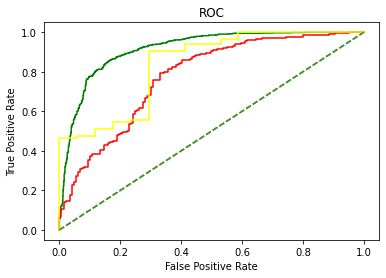

In [121]:

param_grid = {
    'solver': ['svd', 'lsqr', 'eigen']
}

lda = LinearDiscriminantAnalysis()

grid_search_lda = RandomizedSearchCV(estimator = lda, param_distributions = param_grid, scoring="f1", cv = 10)

grid_result_lda=grid_search_lda.fit(x_train_scaled,y_balanced)

best_grid_lda=grid_result_lda.best_estimator_

ytrain_predict_lda = best_grid_lda.predict(x_train_scaled)
ytest_predict_lda = best_grid_lda.predict(x_test_scaled)
yval_predict_lda = best_grid_lda.predict(x_val_scaled)

lda_train_acc=best_grid_lda.score(x_train_scaled,y_balanced)

lda_metrics=classification_report(y_balanced, ytrain_predict_lda,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_precision=round(df.loc["1"][0],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_f1=round(df.loc["1"][2],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)
print ('lda_train_acc ',lda_train_acc)

lda_train_fpr, lda_train_tpr,_=roc_curve(y_balanced,best_grid_lda.predict_proba(x_train_scaled)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lda_train_auc=roc_auc_score(y_balanced,best_grid_lda.predict_proba(x_train_scaled)[:,1])
print('Area under Curve is', rf_train_auc)

lda_test_acc=best_grid_lda.score(x_test_scaled,y_test1)

lda_metrics=classification_report(y_test1, ytest_predict_lda,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)
print ('lda_test_acc ',lda_test_acc)

lda_test_fpr, lda_test_tpr,_=roc_curve(y_test1,best_grid_lda.predict_proba(x_test_scaled)[:,1])
plt.plot(lda_test_fpr,lda_test_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lda_test_auc=roc_auc_score(y_test1,best_grid_lda.predict_proba(x_test_scaled)[:,1])
print('Area under Curve is', rf_test_auc)

lda_val_acc=best_grid_lda.score(x_val_scaled,y_val)

lda_metrics=classification_report(y_val, yval_predict_lda,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_val_precision=round(df.loc["1"][0],2)
lda_val_recall=round(df.loc["1"][1],2)
lda_val_f1=round(df.loc["1"][2],2)
print ('lda_val_precision ',lda_val_precision)
print ('lda_val_recall ',lda_val_recall)
print ('lda_val_f1 ',lda_val_f1)
print ('lda_val_acc ',lda_val_acc)

lda_val_fpr, lda_val_tpr,_=roc_curve(y_val,best_grid_lda.predict_proba(x_val_scaled)[:,1])
plt.plot(lda_val_fpr,lda_val_tpr,color='yellow')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lda_test_auc=roc_auc_score(y_val,best_grid_lda.predict_proba(x_val_scaled)[:,1])
print('Area under Curve is', rf_val_auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimato

svc_train_precision  1.0
svc_train_recall  1.0
svc_train_f1  1.0
svc_train_acc  1.0
Area under Curve is 1.0
svc_test_precision  0.92
svc_test_recall  1.0
svc_test_f1  0.96
svc_test_acc  0.9241603466955579
Area under Curve is 0.945727763036956
svc_val_precision  0.91
svc_val_recall  1.0
svc_val_f1  0.95
svc_val_acc  0.912621359223301
Area under Curve is 0.926812585499316


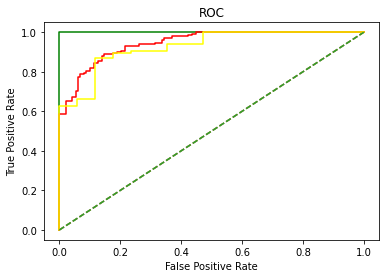

In [123]:
param_grid = {
    'gamma': ['scale', 1,2,3,4,5,6,7,8,9,10],
    'C':[-1,0,1,2,3,4,5,6,7,8,9,10]
}

classifier = SVC(kernel='rbf', probability=True, random_state = 1)

grid_search_svc = RandomizedSearchCV(estimator = classifier, param_distributions = param_grid, scoring="f1", cv = 5)

grid_result_svc=grid_search_svc.fit(x_train_scaled,y_balanced)

svm_fit=grid_result_svc.best_estimator_

svc_train_acc=svm_fit.score(x_train_scaled,y_balanced)
svc_test_acc=svm_fit.score(x_test_scaled,y_test1)
svc_val_acc=svm_fit.score(x_val_scaled,y_val)

ytrain_predict_SVC = svm_fit.predict(x_train_scaled)
ytest_predict_SVC = svm_fit.predict(x_test_scaled)
yval_predict_SVC = svm_fit.predict(x_val_scaled)
ytest_predict_prob_SVC=svm_fit.predict_proba(x_test_scaled)
yval_predict_prob_SVC=svm_fit.predict_proba(x_val_scaled)
pd.DataFrame(ytrain_predict_SVC).head()

# train data metrics
svc_metrics=classification_report(y_balanced, ytrain_predict_SVC,output_dict=True)
df=pd.DataFrame(svc_metrics).transpose()
svc_train_precision=round(df.loc["1"][0],2)
svc_train_recall=round(df.loc["1"][1],2)
svc_train_f1=round(df.loc["1"][2],2)
svc_train_auc=roc_auc_score(y_balanced,svm_fit.predict_proba(x_train_scaled)[:,1])
svc_train_acc=svm_fit.score(x_train_scaled,y_balanced)
print ('svc_train_precision ',svc_train_precision)
print ('svc_train_recall ',svc_train_recall)
print ('svc_train_f1 ',svc_train_f1)
print ('svc_train_acc ',svc_train_acc)

svc_train_fpr, svc_train_tpr,_=roc_curve(y_balanced,svm_fit.predict_proba(x_train_scaled)[:,1])
plt.plot(svc_train_fpr,svc_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
svc_train_auc=roc_auc_score(y_balanced,svm_fit.predict_proba(x_train_scaled)[:,1])
print('Area under Curve is', svc_train_auc)

# test data metrics
svc_metrics=classification_report(y_test1, ytest_predict_SVC,output_dict=True)
df=pd.DataFrame(svc_metrics).transpose()
svc_test_precision=round(df.loc["1"][0],2)
svc_test_recall=round(df.loc["1"][1],2)
svc_test_f1=round(df.loc["1"][2],2)
svc_test_auc=roc_auc_score(y_test1,svm_fit.predict_proba(x_test_scaled)[:,1])
svc_test_acc=svm_fit.score(x_test_scaled,y_test1)
print ('svc_test_precision ',svc_test_precision)
print ('svc_test_recall ',svc_test_recall)
print ('svc_test_f1 ',svc_test_f1)
print ('svc_test_acc ',svc_test_acc)

svc_test_fpr, svc_test_tpr,_=roc_curve(y_test1,svm_fit.predict_proba(x_test_scaled)[:,1])
plt.plot(svc_test_fpr,svc_test_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
svc_test_auc=roc_auc_score(y_test1,svm_fit.predict_proba(x_test_scaled)[:,1])
print('Area under Curve is', svc_test_auc)

# val data metrics
svc_metrics=classification_report(y_val, yval_predict_SVC,output_dict=True)
df=pd.DataFrame(svc_metrics).transpose()
svc_val_precision=round(df.loc["1"][0],2)
svc_val_recall=round(df.loc["1"][1],2)
svc_val_f1=round(df.loc["1"][2],2)
svc_val_auc=roc_auc_score(y_val,svm_fit.predict_proba(x_val_scaled)[:,1])
svc_val_acc=svm_fit.score(x_val_scaled,y_val)
print ('svc_val_precision ',svc_val_precision)
print ('svc_val_recall ',svc_val_recall)
print ('svc_val_f1 ',svc_val_f1)
print ('svc_val_acc ',svc_val_acc)

svc_val_fpr, svc_val_tpr,_=roc_curve(y_val,svm_fit.predict_proba(x_val_scaled)[:,1])
plt.plot(svc_val_fpr,svc_val_tpr,color='yellow')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
svc_val_auc=roc_auc_score(y_val,svm_fit.predict_proba(x_val_scaled)[:,1])
print('Area under Curve is', svc_val_auc)

In [126]:
grid_result_svc.best_estimator_

SVC(C=9, gamma=1, probability=True, random_state=1)

knn_train_precision  1.0
knn_train_recall  1.0
knn_train_f1  1.0
knn_train_acc  1.0
Area under Curve is 1.0
knn_test_precision  0.98
knn_test_recall  0.86
knn_test_f1  0.91
knn_test_acc  0.8613217768147345
Area under Curve is 0.9142344310909942


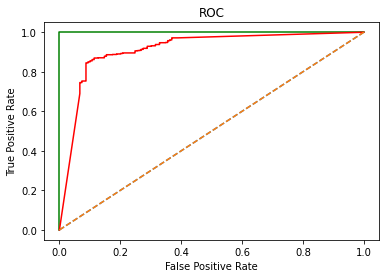

In [124]:
knn = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
knn_fit = knn.fit(x_train_scaled,y_balanced)

knn_train_acc=knn_fit.score(x_train_scaled,y_balanced)
knn_test_acc=knn_fit.score(x_test_scaled,y_test1)
knn_val_acc=knn_fit.score(x_val_scaled,y_val)

ytrain_predict_KNN = knn_fit.predict(x_train_scaled)
ytest_predict_KNN = knn_fit.predict(x_test_scaled)
yval_predict_KNN = knn_fit.predict(x_val_scaled)
ytest_predict_prob_KNN=knn_fit.predict_proba(x_test_scaled)
yval_predict_prob_KNN=knn_fit.predict_proba(x_val_scaled)
pd.DataFrame(ytrain_predict_KNN).head()

# train data metrics
knn_metrics=classification_report(y_balanced, ytrain_predict_KNN,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_train_precision=round(df.loc["1"][0],2)
knn_train_recall=round(df.loc["1"][1],2)
knn_train_f1=round(df.loc["1"][2],2)
knn_train_auc=roc_auc_score(y_balanced,knn_fit.predict_proba(x_train_scaled)[:,1])
knn_train_acc=knn_fit.score(x_train_scaled,y_balanced)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)
print ('knn_train_acc ',knn_train_acc)

knn_train_fpr, knn_train_tpr,_=roc_curve(y_balanced,knn_fit.predict_proba(x_train_scaled)[:,1])
plt.plot(svc_train_fpr,svc_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
knn_train_auc=roc_auc_score(y_balanced,knn_fit.predict_proba(x_train_scaled)[:,1])
print('Area under Curve is', knn_train_auc)

# test data metrics
knn_metrics=classification_report(y_test1, ytest_predict_KNN,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_test_precision=round(df.loc["1"][0],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_f1=round(df.loc["1"][2],2)
knn_test_auc=roc_auc_score(y_test1,knn_fit.predict_proba(x_test_scaled)[:,1])
knn_test_acc=knn_fit.score(x_test_scaled,y_test1)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)
print ('knn_test_acc ',knn_test_acc)

knn_test_fpr, knn_test_tpr,_=roc_curve(y_test1,knn_fit.predict_proba(x_test_scaled)[:,1])
plt.plot(knn_test_fpr,knn_test_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
knn_test_auc=roc_auc_score(y_test1,knn_fit.predict_proba(x_test_scaled)[:,1])
print('Area under Curve is', knn_test_auc)

bgcl_train_precision  1.0
bgcl_train_recall  0.99
bgcl_train_f1  0.99
bgcl_train_acc  0.9927989981214778
bgcl_test_precision  0.92
bgcl_test_recall  1.0
bgcl_test_f1  0.96
bgcl_test_acc  0.8407367280606717
Area under Curve is 0.9999803953013027
Area under Curve is 0.8986785286925759


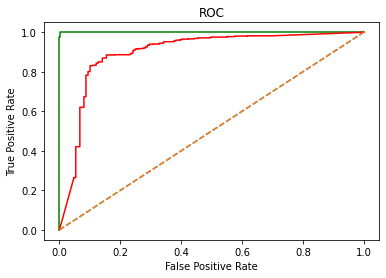

In [129]:
bgcl_trans_knn=BaggingClassifier(base_estimator=knn, random_state=0)

grid_search_bgcl_knn=bgcl_trans_knn.fit(x_train_scaled,y_balanced)

best_grid_bgcl_knn=grid_search_bgcl_knn#.estimators_

bgcl_train_acc_knn=best_grid_bgcl_knn.score(x_train_scaled,y_balanced)
bgcl_test_acc_knn=best_grid_bgcl_knn.score(x_test_scaled,y_test1)

ytrain_predict_BGCL_knn = best_grid_bgcl_knn.predict(x_train_scaled)
ytest_predict_BGCL_knn = best_grid_bgcl_knn.predict(x_test_scaled)
ytest_predict_prob_BGCL_k=best_grid_bgcl_knn.predict_proba(x_test_scaled)
pd.DataFrame(ytrain_predict_BGCL_knn).head()

# train data metrics
bgcl_metrics_knn=classification_report(y_balanced, ytrain_predict_BGCL_knn,output_dict=True)
df=pd.DataFrame(bgcl_metrics_knn).transpose()
bgcl_train_precision_k=round(df.loc["1"][0],2)
bgcl_train_recall_k=round(df.loc["1"][1],2)
bgcl_train_f1_k=round(df.loc["1"][2],2)
bgcl_train_auc_k=roc_auc_score(y_balanced,best_grid_bgcl_knn.predict_proba(x_train_scaled)[:,1])
bgcl_train_acc_k=best_grid_bgcl_knn.score(x_train_scaled,y_balanced)
print ('bgcl_train_precision ',bgcl_train_precision_k)
print ('bgcl_train_recall ',bgcl_train_recall_k)
print ('bgcl_train_f1 ',bgcl_train_f1_k)
print ('bgcl_train_acc ',bgcl_train_acc_k)

# test data metrics
bgcl_metrics_knn=classification_report(y_test1, ytest_predict_BGCL_trans,output_dict=True)
df=pd.DataFrame(bgcl_metrics_knn).transpose()
bgcl_test_precision_k=round(df.loc["1"][0],2)
bgcl_test_recall_k=round(df.loc["1"][1],2)
bgcl_test_f1_k=round(df.loc["1"][2],2)
bgcl_test_auc_k=roc_auc_score(y_test1,best_grid_bgcl_knn.predict_proba(x_test_scaled)[:,1])
bgcl_test_acc_k=best_grid_bgcl_knn.score(x_test_scaled,y_test1)
print ('bgcl_test_precision ',bgcl_test_precision_k)
print ('bgcl_test_recall ',bgcl_test_recall_k)
print ('bgcl_test_f1 ',bgcl_test_f1_k)
print ('bgcl_test_acc ',bgcl_test_acc_k)

bgcl_train_fpr, bgcl_train_tpr,_=roc_curve(y_balanced,best_grid_bgcl_knn.predict_proba(x_train_scaled)[:,1])
plt.plot(bgcl_train_fpr,bgcl_train_tpr,color='green',label='Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
bgcl_train_auc_k=roc_auc_score(y_balanced,best_grid_bgcl_knn.predict_proba(x_train_scaled)[:,1])
print('Area under Curve is', bgcl_train_auc_k)

bgcl_test_fpr, bgcl_test_tpr,_=roc_curve(y_test1,best_grid_bgcl_knn.predict_proba(x_test_scaled)[:,1])
plt.plot(bgcl_test_fpr,bgcl_test_tpr,color='red',label='Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
bgcl_test_auc_k=roc_auc_score(y_test1,best_grid_bgcl_knn.predict_proba(x_test_scaled)[:,1])
print('Area under Curve is', bgcl_test_auc_k)

bgcl_train_precision  0.99
bgcl_train_recall  1.0
bgcl_train_f1  1.0
bgcl_train_acc  0.9968691296180339
bgcl_test_precision  0.92
bgcl_test_recall  1.0
bgcl_test_f1  0.96
bgcl_test_acc  0.9241603466955579
Area under Curve is 0.9999901976506513
Area under Curve is 0.9347328442848968


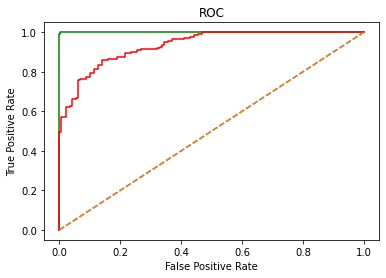

In [128]:
svc_class = SVC(kernel='rbf',C=9, gamma=1, probability=True, random_state=1)
bgcl_trans=BaggingClassifier(base_estimator=svc_class, random_state=0)

grid_search_bgcl_trans=bgcl_trans.fit(x_train_scaled,y_balanced)

best_grid_bgcl_trans=grid_search_bgcl_trans#.estimators_

bgcl_train_acc_trans=best_grid_bgcl_trans.score(x_train_scaled,y_balanced)
bgcl_test_acc_trans=best_grid_bgcl_trans.score(x_test_scaled,y_test1)

ytrain_predict_BGCL_trans = best_grid_bgcl_trans.predict(x_train_scaled)
ytest_predict_BGCL_trans = best_grid_bgcl_trans.predict(x_test_scaled)
ytest_predict_prob_BGCL_t=best_grid_bgcl_trans.predict_proba(x_test_scaled)
pd.DataFrame(ytrain_predict_BGCL_trans).head()

# train data metrics
bgcl_metrics_trans=classification_report(y_balanced, ytrain_predict_BGCL_trans,output_dict=True)
df=pd.DataFrame(bgcl_metrics_trans).transpose()
bgcl_train_precision_t=round(df.loc["1"][0],2)
bgcl_train_recall_t=round(df.loc["1"][1],2)
bgcl_train_f1_t=round(df.loc["1"][2],2)
bgcl_train_auc_t=roc_auc_score(y_balanced,best_grid_bgcl_trans.predict_proba(x_train_scaled)[:,1])
bgcl_train_acc_t=best_grid_bgcl_trans.score(x_train_scaled,y_balanced)
print ('bgcl_train_precision ',bgcl_train_precision_t)
print ('bgcl_train_recall ',bgcl_train_recall_t)
print ('bgcl_train_f1 ',bgcl_train_f1_t)
print ('bgcl_train_acc ',bgcl_train_acc_t)

# test data metrics
bgcl_metrics_trans=classification_report(y_test1, ytest_predict_BGCL_trans,output_dict=True)
df=pd.DataFrame(bgcl_metrics_trans).transpose()
bgcl_test_precision_t=round(df.loc["1"][0],2)
bgcl_test_recall_t=round(df.loc["1"][1],2)
bgcl_test_f1_t=round(df.loc["1"][2],2)
bgcl_test_auc_t=roc_auc_score(y_test1,best_grid_bgcl_trans.predict_proba(x_test_scaled)[:,1])
bgcl_test_acc_t=best_grid_bgcl_trans.score(x_test_scaled,y_test1)
print ('bgcl_test_precision ',bgcl_test_precision_t)
print ('bgcl_test_recall ',bgcl_test_recall_t)
print ('bgcl_test_f1 ',bgcl_test_f1_t)
print ('bgcl_test_acc ',bgcl_test_acc_t)

bgcl_train_fpr, bgcl_train_tpr,_=roc_curve(y_balanced,best_grid_bgcl_trans.predict_proba(x_train_scaled)[:,1])
plt.plot(bgcl_train_fpr,bgcl_train_tpr,color='green',label='Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
bgcl_train_auc_t=roc_auc_score(y_balanced,best_grid_bgcl_trans.predict_proba(x_train_scaled)[:,1])
print('Area under Curve is', bgcl_train_auc_t)

bgcl_test_fpr, bgcl_test_tpr,_=roc_curve(y_test1,best_grid_bgcl_trans.predict_proba(x_test_scaled)[:,1])
plt.plot(bgcl_test_fpr,bgcl_test_tpr,color='red',label='Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
bgcl_test_auc_t=roc_auc_score(y_test1,best_grid_bgcl_trans.predict_proba(x_test_scaled)[:,1])
print('Area under Curve is', bgcl_test_auc_t)

bgcl_train_precision  1.0
bgcl_train_recall  1.0
bgcl_train_f1  1.0
bgcl_train_acc  0.9978083907326236
bgcl_test_precision  0.94
bgcl_test_recall  0.97
bgcl_test_f1  0.96
bgcl_test_acc  0.9252437703141928
Area under Curve is 0.9999302072726375
Area under Curve is 0.9210238801311067


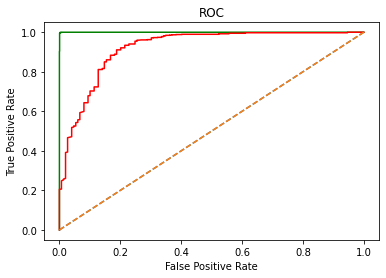

In [133]:
bgcl_rfcl=BaggingClassifier(base_estimator=rfcl, random_state=0)

grid_search_bgcl_rfcl=bgcl_rfcl.fit(x_balanced,y_balanced)

best_grid_bgcl_rfcl=grid_search_bgcl_rfcl#.estimators_

bgcl_train_acc_rfcl=best_grid_bgcl_rfcl.score(x_balanced,y_balanced)
bgcl_test_acc_rfcl=best_grid_bgcl_rfcl.score(x_test1,y_test1)

ytrain_predict_BGCL_rfcl = best_grid_bgcl_rfcl.predict(x_balanced)
ytest_predict_BGCL_rfcl = best_grid_bgcl_rfcl.predict(x_test1)
ytest_predict_prob_BGCL_r=best_grid_bgcl_rfcl.predict_proba(x_test1)
pd.DataFrame(ytrain_predict_BGCL_rfcl).head()

# train data metrics
bgcl_metrics_rfcl=classification_report(y_balanced, ytrain_predict_BGCL_rfcl,output_dict=True)
df=pd.DataFrame(bgcl_metrics_rfcl).transpose()
bgcl_train_precision_r=round(df.loc["1"][0],2)
bgcl_train_recall_r=round(df.loc["1"][1],2)
bgcl_train_f1_r=round(df.loc["1"][2],2)
bgcl_train_auc_r=roc_auc_score(y_balanced,best_grid_bgcl_rfcl.predict_proba(x_balanced)[:,1])
bgcl_train_acc_r=best_grid_bgcl_rfcl.score(x_balanced,y_balanced)
print ('bgcl_train_precision ',bgcl_train_precision_r)
print ('bgcl_train_recall ',bgcl_train_recall_r)
print ('bgcl_train_f1 ',bgcl_train_f1_r)
print ('bgcl_train_acc ',bgcl_train_acc_r)

# test data metrics
bgcl_metrics_rfcl=classification_report(y_test1, ytest_predict_BGCL_rfcl,output_dict=True)
df=pd.DataFrame(bgcl_metrics_rfcl).transpose()
bgcl_test_precision_r=round(df.loc["1"][0],2)
bgcl_test_recall_r=round(df.loc["1"][1],2)
bgcl_test_f1_r=round(df.loc["1"][2],2)
bgcl_test_auc_r=roc_auc_score(y_test1,best_grid_bgcl_rfcl.predict_proba(x_test1)[:,1])
bgcl_test_acc_r=best_grid_bgcl_rfcl.score(x_test1,y_test1)
print ('bgcl_test_precision ',bgcl_test_precision_r)
print ('bgcl_test_recall ',bgcl_test_recall_r)
print ('bgcl_test_f1 ',bgcl_test_f1_r)
print ('bgcl_test_acc ',bgcl_test_acc_r)

bgcl_train_fpr, bgcl_train_tpr,_=roc_curve(y_balanced,best_grid_bgcl_rfcl.predict_proba(x_balanced)[:,1])
plt.plot(bgcl_train_fpr,bgcl_train_tpr,color='green',label='Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
bgcl_train_auc_r=roc_auc_score(y_balanced,best_grid_bgcl_rfcl.predict_proba(x_balanced)[:,1])
print('Area under Curve is', bgcl_train_auc_r)

bgcl_test_fpr, bgcl_test_tpr,_=roc_curve(y_test1,best_grid_bgcl_rfcl.predict_proba(x_test1)[:,1])
plt.plot(bgcl_test_fpr,bgcl_test_tpr,color='red',label='Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
bgcl_test_auc_r=roc_auc_score(y_test1,best_grid_bgcl_rfcl.predict_proba(x_test1)[:,1])
print('Area under Curve is', bgcl_test_auc_r)

In [134]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'Bagging KNN Train':[bgcl_train_acc_k,bgcl_train_auc_k,bgcl_train_recall_k,bgcl_train_precision_k,bgcl_train_f1_k],
        'Bagging KNN Test':[bgcl_test_acc_k,bgcl_test_auc_k,bgcl_test_recall_k,bgcl_test_precision_k,bgcl_test_f1_k],
        'Bagging SVC Train':[bgcl_train_acc_t,bgcl_train_auc_t,bgcl_train_recall_t,bgcl_train_precision_t,bgcl_train_f1_t],
        'Bagging SVC Test':[bgcl_test_acc_t,bgcl_test_auc_t,bgcl_test_recall_t,bgcl_test_precision_t,bgcl_test_f1_t],             
        'Bagging RF Train':[bgcl_train_acc_r,bgcl_train_auc_r,bgcl_train_recall_r,bgcl_train_precision_r,bgcl_train_f1_r],
        'Bagging RF Test':[bgcl_test_acc_r,bgcl_test_auc_r,bgcl_test_recall_r,bgcl_test_precision_r,bgcl_test_f1_r],                          
        'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'Support Vector Train':[svc_train_acc,svc_train_auc,svc_train_recall,svc_train_precision,svc_train_f1],
        'Support Vector Test':[svc_test_acc,svc_test_auc,svc_test_recall,svc_test_precision,svc_test_f1],
        'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1]
        },index=index)
round(data,2)

,Random Forest Train,Random Forest Test,Bagging KNN Train,Bagging KNN Test,Bagging SVC Train,Bagging SVC Test,Bagging RF Train,Bagging RF Test,LDA Train,LDA Test,Support Vector Train,Support Vector Test,KNN Train,KNN Test
Accuracy,0.85,0.78,0.99,0.84,1.00,0.92,1.0,0.93,0.76,0.75,1.0,0.92,1.0,0.86
AUC,0.92,0.76,1.00,0.90,1.00,0.93,1.0,0.92,0.84,0.84,1.0,0.95,1.0,0.91
Recall,0.86,0.83,0.99,1.00,1.00,1.00,1.0,0.97,0.77,0.77,1.0,1.00,1.0,0.86
Precision,0.84,0.90,1.00,0.92,0.99,0.92,1.0,0.94,0.76,0.92,1.0,0.92,1.0,0.98
F1 Score,0.85,0.87,0.99,0.96,1.00,0.96,1.0,0.96,0.76,0.84,1.0,0.96,1.0,0.91


In [138]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in grid_search_bgcl_rfcl.estimators_
], axis=0)

pd.DataFrame(feature_importances,columns=['Importance'],index=x_balanced.columns).reset_index().sort_values(by='Importance',ascending=False)

,index,Importance
9,Audience_number,0.091038
19,Players_scored_zero,0.080219
13,Extra_bowls_bowled,0.069026
7,Opponent,0.061333
17,extra_bowls_opponent,0.060123
0,Avg_team_Age,0.059934
8,Season,0.059828
18,player_highest_run,0.056872
12,Max_wicket_taken_1over,0.056017
14,Min_run_given_1over,0.055517


In [148]:
import pickle

#pickle_out = open('D://PGP-DSBA//Project//Flask//CWP_flask2.pkl','wb')
#pickle.dump(best_grid_bgcl_rfcl,pickle_out)
loaded_model = pickle.load(open('D://PGP-DSBA//Project//Flask//CWP_flask2.pkl','rb'))
result = loaded_model.score(x_test1,y_test1) #done to verify the prediction
print(result)

#pickle_ss = open('D://PGP-DSBA//Project//Flask//CWP_flask3.pkl','wb')
#pickle.dump(ss,pickle_ss)
#ss = pickle.load(open('D://PGP-DSBA//Project//Flask//CWP_flask3.pkl','rb'))
dat = pd.Series([30, 1, 2, 1, 1, 6, 2, 1, 3, 1000, 0, 30, 1, 40, 0, 0, 10, 0, 20, 1, 1])
dat_reshape = dat.values.reshape(1, -1)
result = loaded_model.predict(dat_reshape) #done to verify the prediction
print(result)
result = best_grid_bgcl_rfcl.predict(dat_reshape)
print(result)x`

0.9252437703141928
[1]
[1]


In [170]:
val = [0,1,0,1,0,0,1,50,1,0,1]
dat = np.array(val).reshape(1,11)
loaded_model = pickle.load(open('CWP_flask.pkl','rb'))
result = loaded_model.predict(dat) #done to verify the prediction
print(result)

[0]


In [194]:
cric_data[(cric_data.Result=='Loss')&(cric_data.Opponent=='England')]

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
91,Game_92,Loss,24.0,Day,ODI,1.0,1,2.0,Batting,England,...,19.0,1,4.0,3,4.0,6.0,2,34.0,3,2
107,Game_108,Loss,24.0,Day,ODI,1.0,1,2.0,Batting,England,...,19.0,1,4.0,3,4.0,6.0,2,34.0,3,2
759,Game_760,Loss,30.0,Day and Night,ODI,4.0,1,1.0,Bowling,England,...,15.0,4,18.0,2,3.0,6.0,2,53.0,1,3
804,Game_805,Loss,30.0,Day,ODI,2.0,1,2.0,Bowling,England,...,13.0,1,8.0,1,3.0,6.0,0,50.0,2,2
855,Game_856,Loss,30.0,Day and Night,ODI,3.0,1,1.0,Bowling,England,...,11.0,2,17.0,5,3.0,6.0,0,61.0,3,3
1397,Game_1398,Loss,30.0,Day,ODI,4.0,1,NaN,Batting,England,...,14.0,4,31.0,0,2.0,10.0,9,53.0,2,3
1412,Game_1413,Loss,30.0,Day,ODI,4.0,1,4.0,Bowling,England,...,15.0,4,10.0,3,2.0,10.0,2,98.0,3,2
1449,Game_1450,Loss,30.0,Day and Night,ODI,5.0,1,3.0,Batting,England,...,11.0,1,10.0,2,3.0,10.0,8,100.0,4,3
1511,Game_1512,Loss,30.0,Day,ODI,5.0,1,3.0,Batting,England,...,16.0,2,34.0,4,3.0,33.0,7,78.0,2,3
1512,Game_1513,Loss,30.0,Day,ODI,3.0,1,3.0,Bowling,England,...,11.0,1,7.0,2,3.0,6.0,2,81.0,3,2
